In [3]:
# Import programs
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
%matplotlib inline

### PreData Transformation
Original Data had over 500K line of data and we merged people related to the car crashes using Knime which was easier to see if the transformation or join was correct. Any missing data was fixed in Knime (ETL program) We also reduced the file to about 250K lines so it was more managable.
The file below is that combined view

In [386]:
df = pd.read_csv('Traffic_People_v2.csv')
df[1:5]
pd.DataFrame(df)


,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,HOSPITAL,EMS_AGENCY,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE
0,bca52a367d2f053f3a338c9199261b11b245fb00db3b9e...,JF185730,3/25/2022 5:10,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,DIVIDED - W/MEDIAN (NOT RAISED),...,none,none,NONE,NOT OBSCURED,NORMAL,none,none,none,TEST NOT OFFERED,0.179938
1,bca52a367d2f053f3a338c9199261b11b245fb00db3b9e...,JF185730,3/25/2022 5:10,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,DIVIDED - W/MEDIAN (NOT RAISED),...,none,none,NONE,NOT OBSCURED,NORMAL,none,none,none,TEST NOT OFFERED,0.179938
2,91a50c583a041e524a0807626ebcc57cc302a97270d160...,JF185724,3/25/2022 4:45,30,NO CONTROLS,NO CONTROLS,FREEZING RAIN/DRIZZLE,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),...,none,none,FAILED TO YIELD,UNKNOWN,UNKNOWN,none,none,none,TEST NOT OFFERED,0.179938
3,ad540890753eea75c569779c5b35c5005e5f716aa923ab...,JF185729,3/25/2022 4:54,30,NO CONTROLS,UNKNOWN,RAIN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,...,none,none,OTHER,UNKNOWN,IMPAIRED - DRUGS,none,none,none,TEST NOT OFFERED,0.179938
4,333437e5d862419154c01b6583c662385867e7efc8faf8...,JF185739,3/25/2022 5:47,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ALLEY,...,none,none,NONE,UNKNOWN,NORMAL,none,none,none,TEST NOT OFFERED,0.179938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248618,45d62c677e80b1d4730088ac7757e7538a89995db905e4...,JF257299,5/27/2022 7:10,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,NOT DIVIDED,...,none,none,none,none,none,none,none,none,none,0.179938
248619,45d62c677e80b1d4730088ac7757e7538a89995db905e4...,JF257299,5/27/2022 7:10,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,NOT DIVIDED,...,none,none,none,none,none,none,none,none,none,0.179938
248620,5f4ddf734f8b865f2b2f9cfc0813e2425ff8f98dd47818...,JF257288,5/27/2022 6:20,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,NOT DIVIDED,...,REFUSED,none,none,none,none,none,none,none,none,0.179938
248621,7f937f2c6b60ed00346f8e37941e56f670739178dbd0b9...,JF257345,5/27/2022 7:50,30,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,ANGLE,ALLEY,...,REFUSED,none,none,none,none,none,none,none,none,0.179938


### Data Size of Original File
248623 rows and 68 columns

In [224]:
df.describe()

,POSTED_SPEED_LIMIT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,VEHICLE_ID,AGE,BAC_RESULT VALUE
count,248623.000000,248623.00000,248623.000000,248623.000000,248623.000000,248623.000000,248623.000000,248623.000000,248623.000000,248623.000000,248623.0,248623.000000,248623.000000,248623.000000,248623.000000,248623.000000,2.486230e+05,248623.000000,248623.000000
mean,28.923559,3786.41505,1223.580626,2.094118,0.243658,0.001597,0.024065,0.140438,0.077559,2.183491,0.0,13.440856,4.147046,5.858899,41.850617,-87.676220,1.121074e+06,39.270758,0.179938
std,5.322281,2862.65533,697.324309,0.493873,0.651729,0.043218,0.185780,0.493453,0.363912,1.280209,0.0,5.482035,1.990205,3.407678,0.252729,0.500941,9.347873e+04,13.467616,0.004066
min,0.000000,1.00000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.936193,9.647270e+05,0.000000,0.000000
25%,30.000000,1357.00000,712.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,10.000000,2.000000,3.000000,41.778003,-87.722602,1.044070e+06,30.000000,0.179938
50%,30.000000,3314.00000,1123.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,6.000000,41.867270,-87.674871,1.121074e+06,39.270758,0.179938
75%,30.000000,5700.00000,1772.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.0,17.000000,6.000000,9.000000,41.920674,-87.633046,1.191926e+06,44.000000,0.179938
max,70.000000,13799.00000,2535.000000,14.000000,21.000000,3.000000,6.000000,19.000000,8.000000,45.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000,1.595068e+06,103.000000,1.000000


In [225]:
df.isnull().any()

CRASH_RECORD_ID           False
RD_NO                     False
CRASH_DATE                False
POSTED_SPEED_LIMIT        False
TRAFFIC_CONTROL_DEVICE    False
                          ...  
PEDPEDAL_ACTION           False
PEDPEDAL_VISIBILITY       False
PEDPEDAL_LOCATION         False
BAC_RESULT                False
BAC_RESULT VALUE          False
Length: 68, dtype: bool

In [226]:
df.columns

Index(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE', 'POSTED_SPEED_LIMIT',
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I',
       'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 'LONGITUDE', 'LOCATION', 'PERSON_ID', 'PERSON_TYPE',
       'CRASH_RECORD_ID (right)', 'RD_NO (right)', 'VEHICLE_ID',
       'CRASH_DATE (right)

### Change name of file
Changing name of file because we'll need df later to merge cluster assignments

In [227]:
# preerve DF
dff=df

### EDA
We create a pie chart views for categorical and a table for numerical attribute

In [228]:
# Create cat which is list of all categorical columns we want to examine
cat=('TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I',
       'HIT_AND_RUN_I', 'DAMAGE','PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 
       'STREET_DIRECTION',  'MOST_SEVERE_INJURY', 'PERSON_TYPE',
       'SEX', 'SAFETY_EQUIPMENT','AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'HOSPITAL',
       'EMS_AGENCY', 'DRIVER_ACTION', 'DRIVER_VISION', 'PHYSICAL_CONDITION',
       'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY', 'PEDPEDAL_LOCATION')

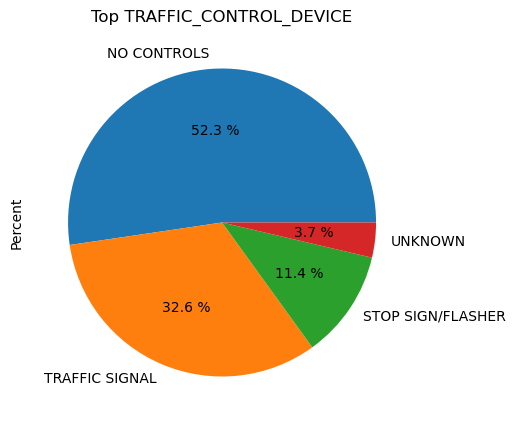

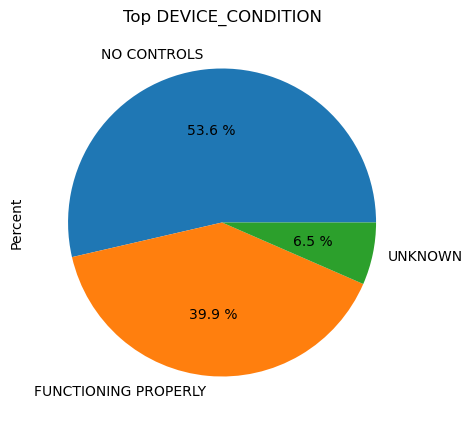

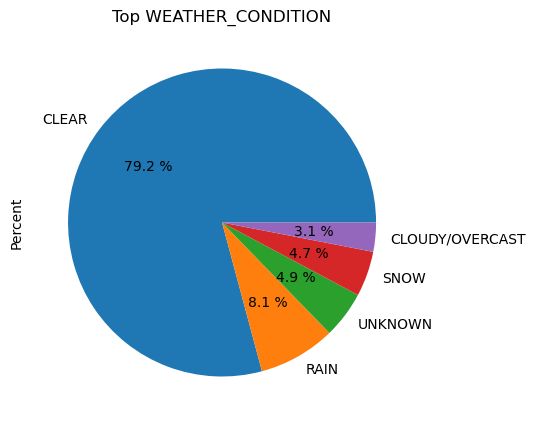

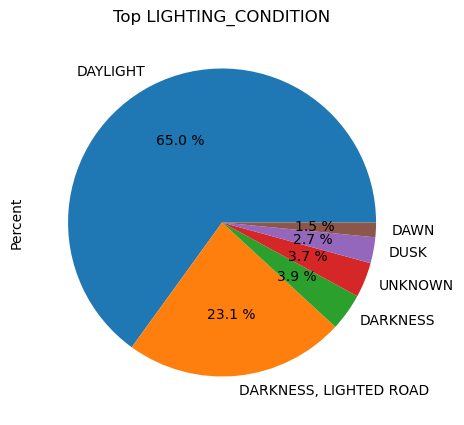

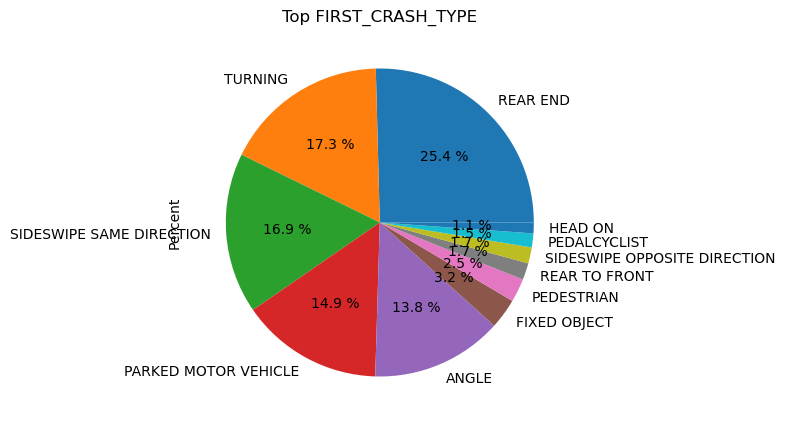

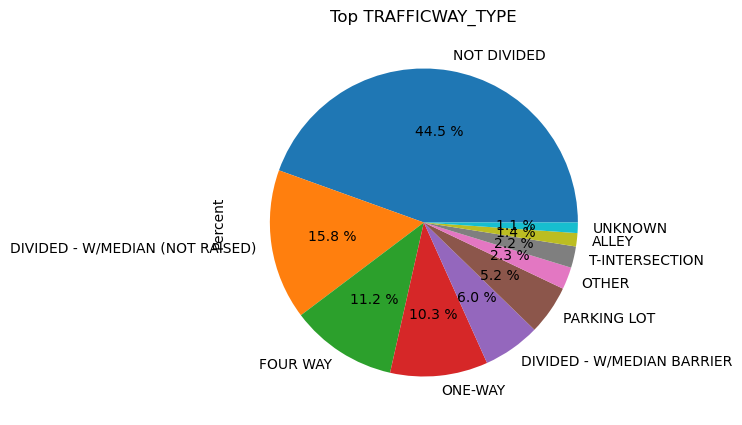

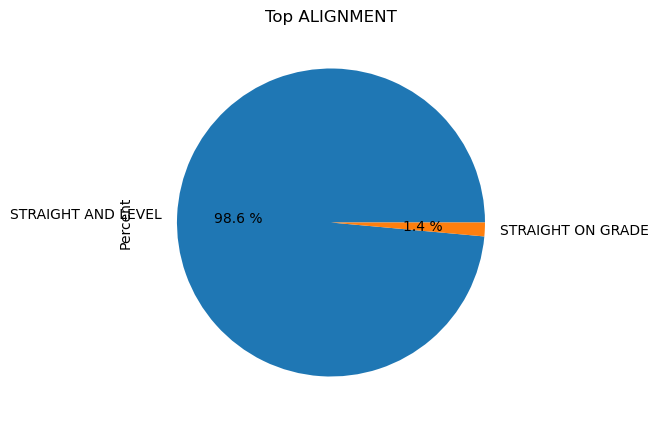

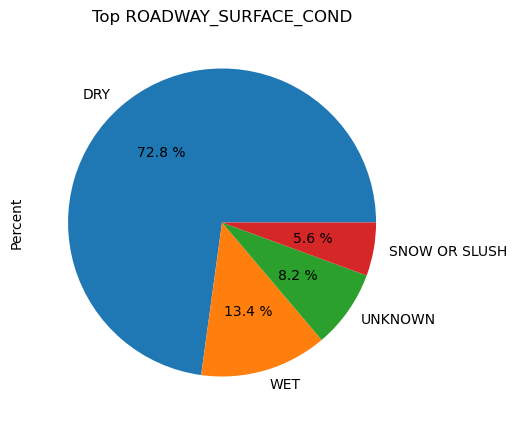

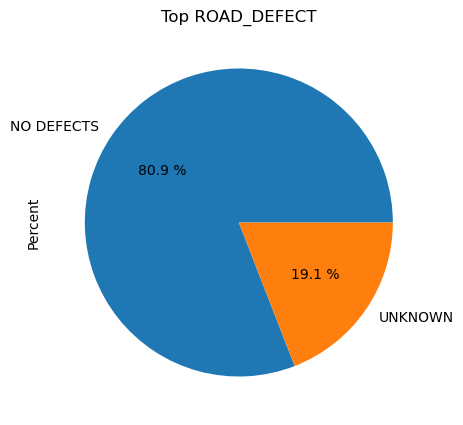

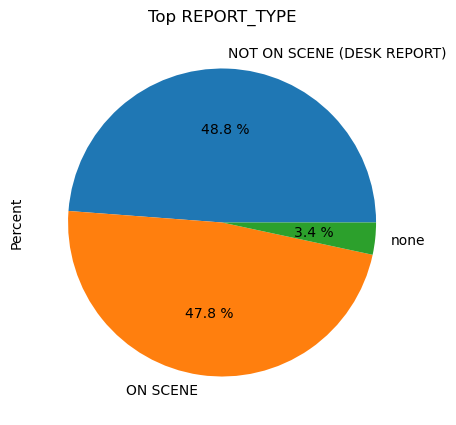

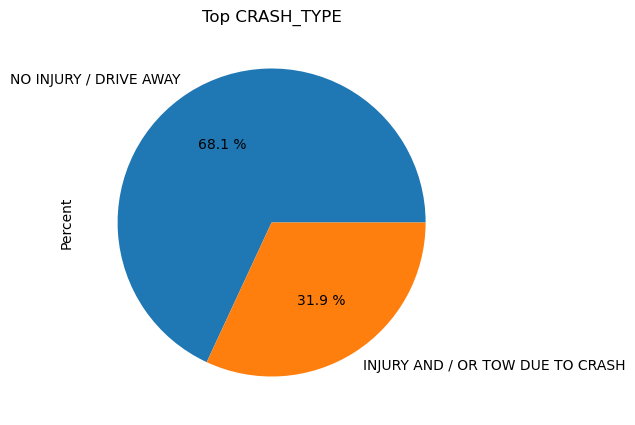

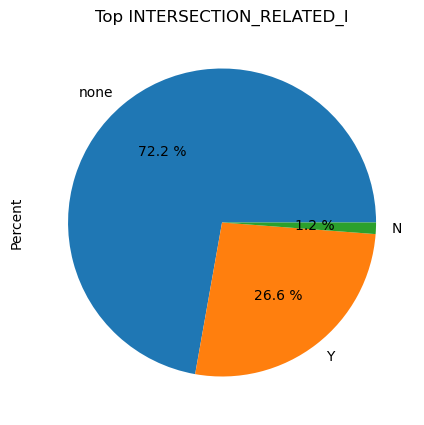

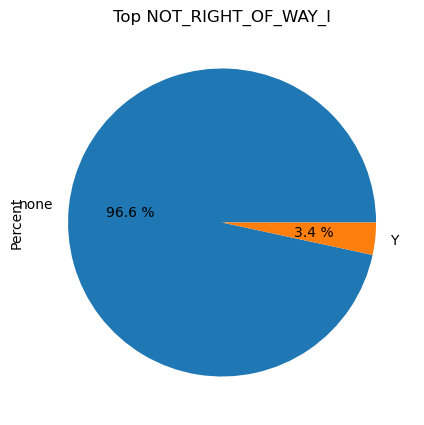

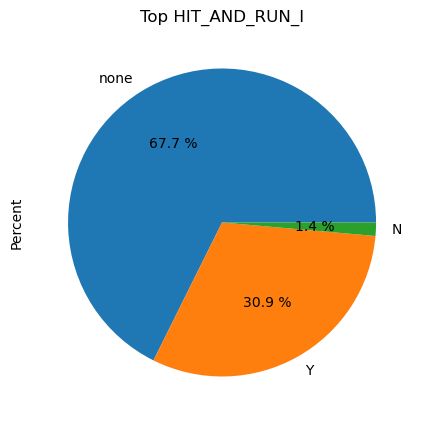

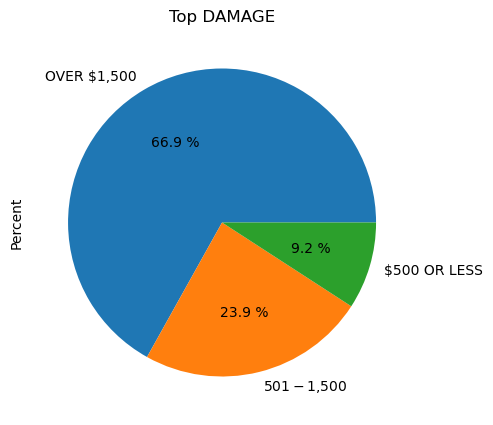

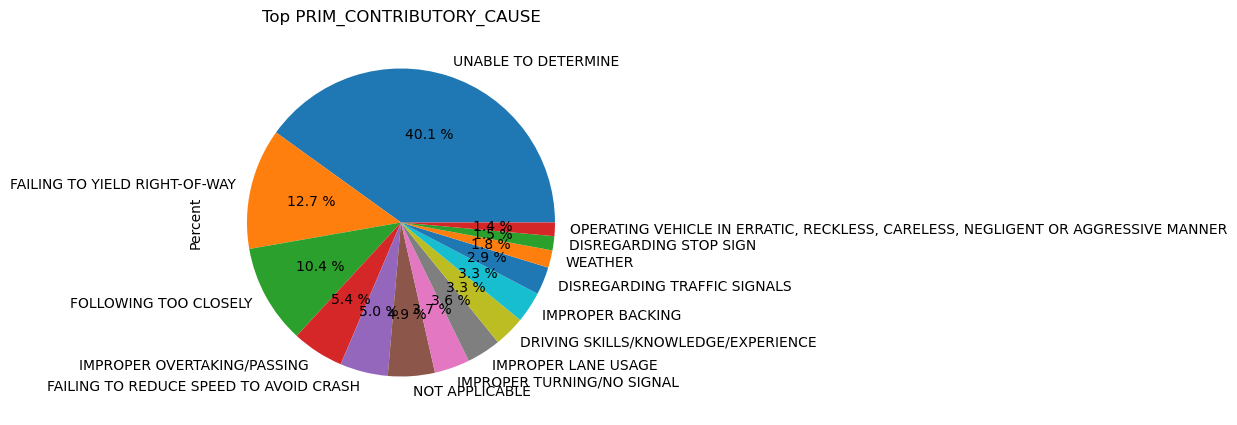

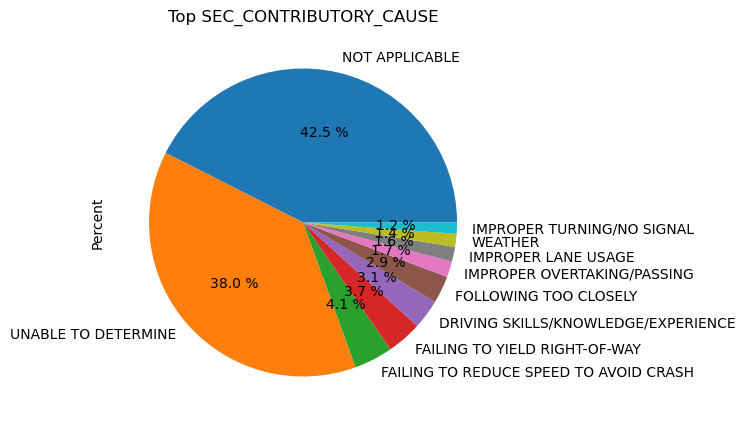

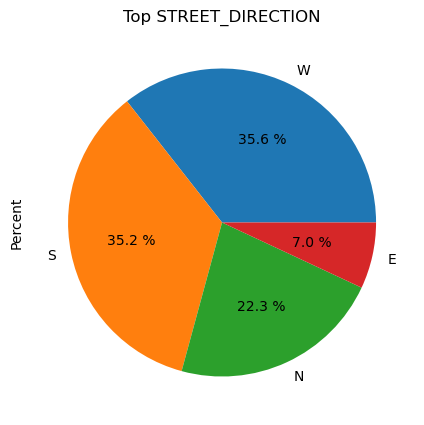

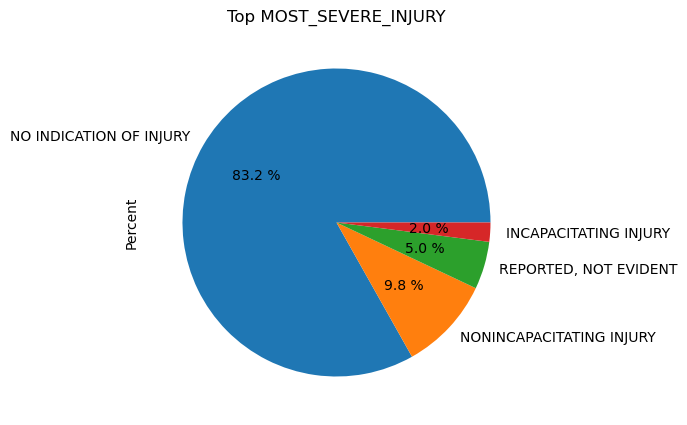

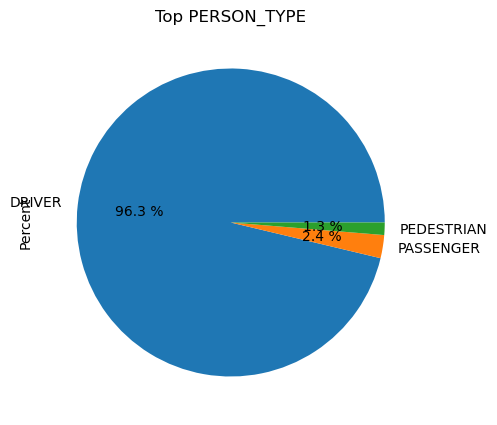

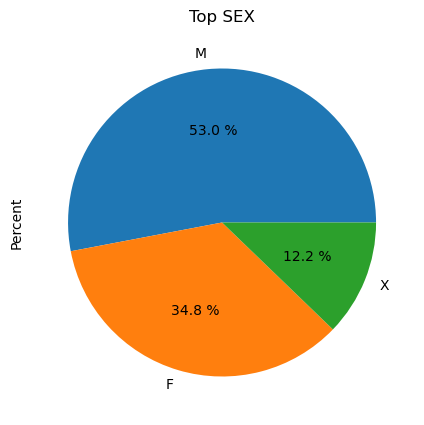

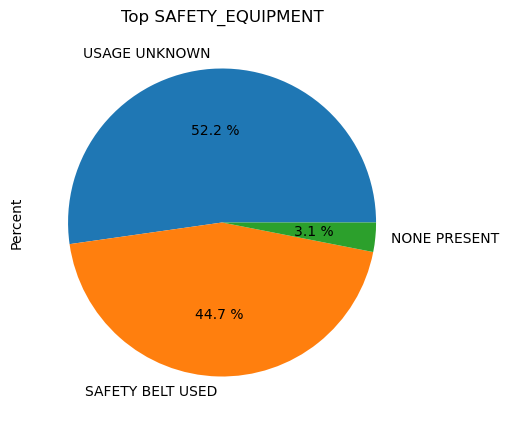

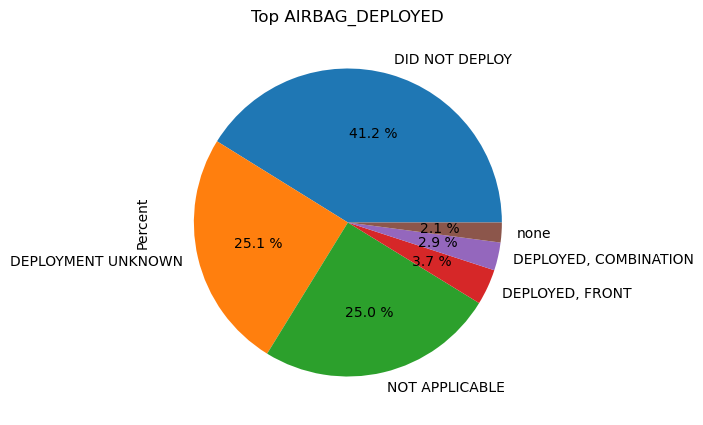

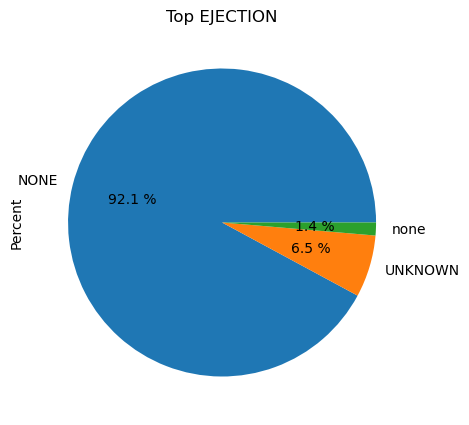

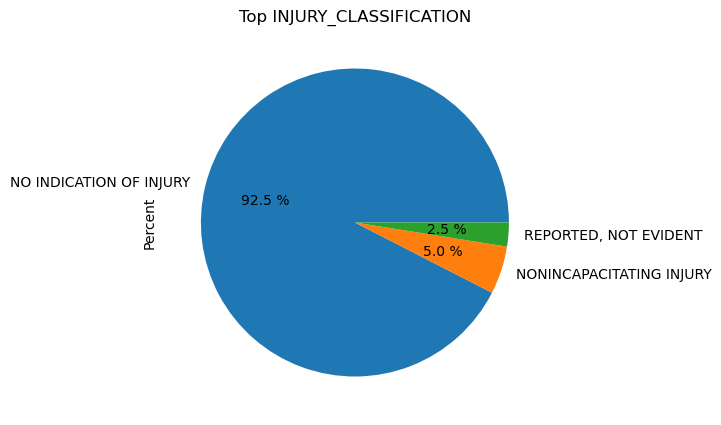

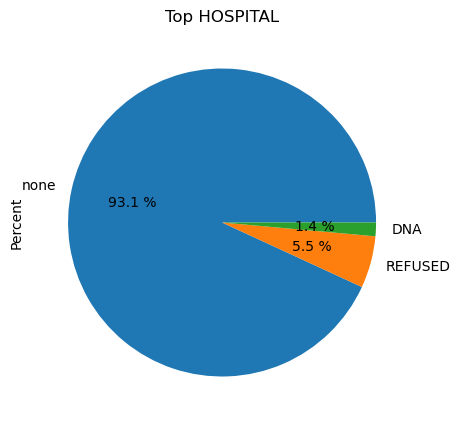

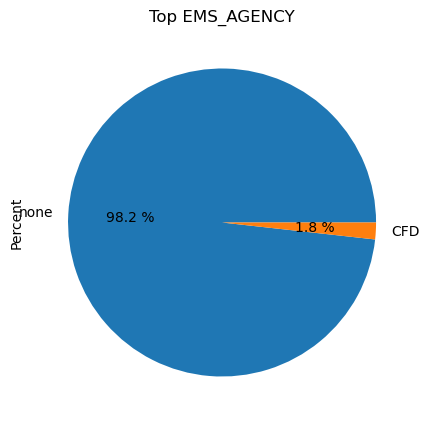

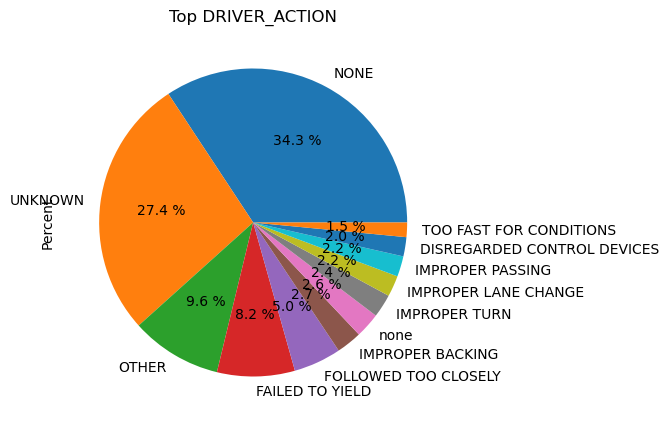

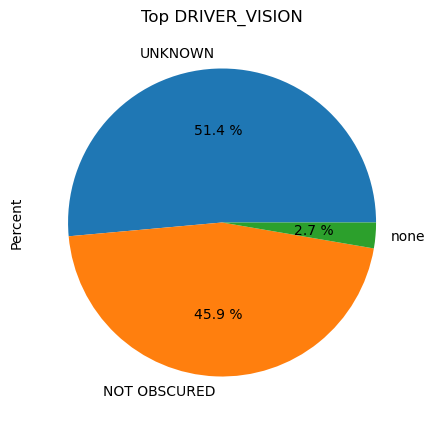

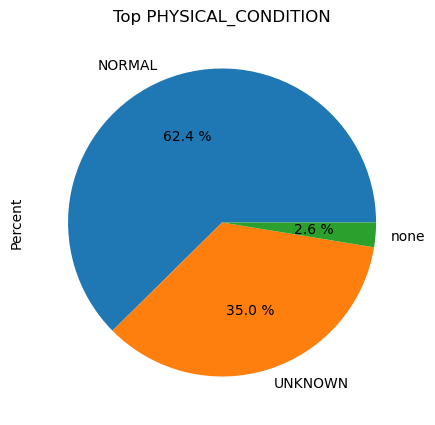

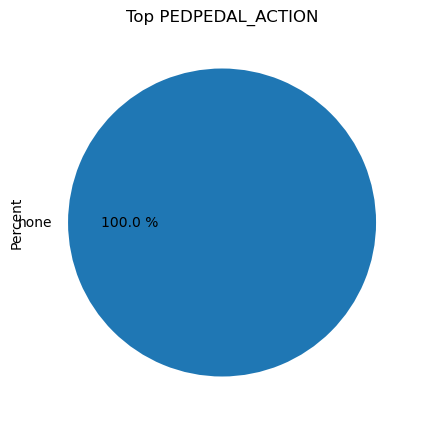

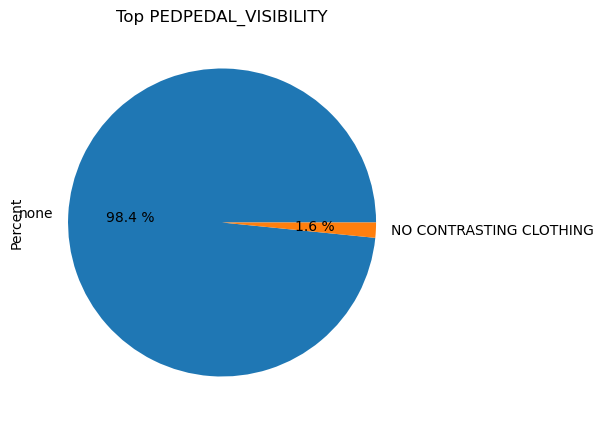

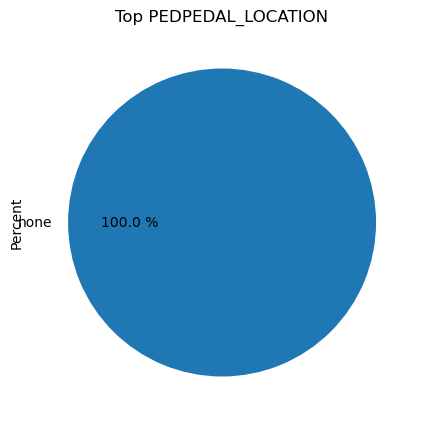

In [229]:
# This creates the pie charts for each categorical attribute in cat above
pies=[]
ylabels=[]

for j in range(len(cat)):
    pies.clear()
    ylabels.clear()
    s=dff[cat[j]]
    y=s.value_counts(normalize=True)

    for i in range(len(s.value_counts(normalize=True))):
        if s.value_counts(normalize=True)[i]>.01:
           pies.append(s.value_counts(normalize=True)[i])
           ylabels.append(y.index.values[i])

    
    s1 = pd.DataFrame({'Categories': (ylabels),
                       'Percent': pies})
    s1.set_index('Categories', inplace=True)
    #print(s)
    plot=s1.plot.pie(y='Percent', figsize=(5,5), legend=False, autopct='%.1f %%', title=('Top ' +  cat[j]))
    plt.show()
    #plt.close()


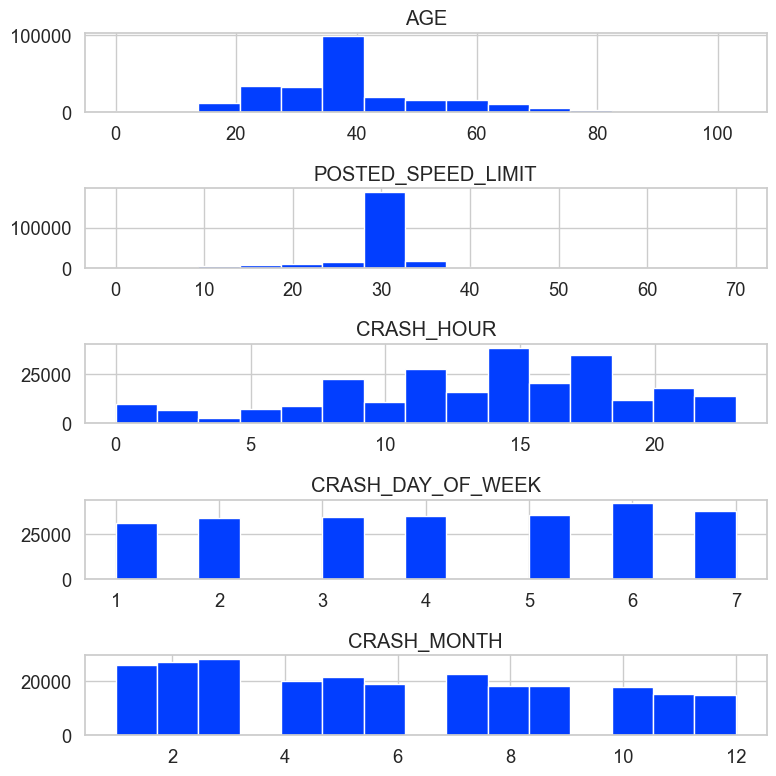

In [442]:
# Histogram
N_points = 240000
n_bins = 15
fig, axs = plt.subplots(5,1 , sharey=False, tight_layout=False,figsize=(8,8))
q=(['AGE','POSTED_SPEED_LIMIT','CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH'])
for i in range(len(q)):
    axs[i].hist(df[q[i]], bins=n_bins)
    axs[i].set_title(q[i])
    plt.close

#### Crash Month and Crash Day data looks wrong or may not be accurate.  The other views look as expected

### Remove very small quantities categories (Block below take 3 hours to run,  I saved file so you can skip over)
We convert any category that has less than 1% in size to to new category named "Other"
Recommend to skip this section below, takes 3 hours to do and was saved into another file, no need to redo

In [ ]:
# Rename small percentage attribute name to Other/Remainder

remove_ylabels=[]
m=0
for m in range(len(cat)):
    s=dff[cat[m]]

    y=s.value_counts(normalize=True)
    remove_ylabels.clear()
    i=0
    j=0
    k=0
    for i in range(len(s.value_counts(normalize=True))):
        if s.value_counts(normalize=True)[i]>.01:
            s.value_counts(normalize=True)[i]
        else:
            remove_ylabels.append(y.index.values[i])

    for j in range(len(remove_ylabels)):

        for k in range(len(s)):
                if s[k]==remove_ylabels[j]:
                    dff.at[k,cat[m]]='Remainder'
                    #s[k]=='Other'
         


NameError: name 'dff' is not defined

### Save new file since this trimming of the data above takes over 3 hours to perform

In [ ]:
 dff.to_csv('TandPremainder2.csv')

####  TandPremainder2.csv relates to categorical data only

In [216]:
# After removing small categories
dff_cat = pd.read_csv('TandPremainder2.csv')
dff_cat[1:5]
pd.DataFrame(dff_cat)


,Unnamed: 0,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,HOSPITAL,EMS_AGENCY,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE
0,0,bca52a367d2f053f3a338c9199261b11b245fb00db3b9e...,JF185730,3/25/2022 5:10,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,...,none,none,NONE,NOT OBSCURED,NORMAL,none,none,none,TEST NOT OFFERED,0.179938
1,1,bca52a367d2f053f3a338c9199261b11b245fb00db3b9e...,JF185730,3/25/2022 5:10,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,...,none,none,NONE,NOT OBSCURED,NORMAL,none,none,none,TEST NOT OFFERED,0.179938
2,2,91a50c583a041e524a0807626ebcc57cc302a97270d160...,JF185724,3/25/2022 4:45,30,NO CONTROLS,NO CONTROLS,Remainder,"DARKNESS, LIGHTED ROAD",REAR END,...,none,none,FAILED TO YIELD,UNKNOWN,UNKNOWN,none,none,none,TEST NOT OFFERED,0.179938
3,3,ad540890753eea75c569779c5b35c5005e5f716aa923ab...,JF185729,3/25/2022 4:54,30,NO CONTROLS,UNKNOWN,RAIN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,...,none,none,OTHER,UNKNOWN,Remainder,none,none,none,TEST NOT OFFERED,0.179938
4,4,333437e5d862419154c01b6583c662385867e7efc8faf8...,JF185739,3/25/2022 5:47,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,...,none,none,NONE,UNKNOWN,NORMAL,none,none,none,TEST NOT OFFERED,0.179938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248618,248618,45d62c677e80b1d4730088ac7757e7538a89995db905e4...,JF257299,5/27/2022 7:10,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,...,none,none,none,none,none,none,none,none,none,0.179938
248619,248619,45d62c677e80b1d4730088ac7757e7538a89995db905e4...,JF257299,5/27/2022 7:10,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,...,none,none,none,none,none,none,none,none,none,0.179938
248620,248620,5f4ddf734f8b865f2b2f9cfc0813e2425ff8f98dd47818...,JF257288,5/27/2022 6:20,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,...,REFUSED,none,none,none,none,none,none,none,none,0.179938
248621,248621,7f937f2c6b60ed00346f8e37941e56f670739178dbd0b9...,JF257345,5/27/2022 7:50,30,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,ANGLE,...,REFUSED,none,none,none,none,none,none,none,none,0.179938


In [217]:
# trim firt 5 column
dff_cat=dff_cat.iloc[0:,5:69]
dff_cat

,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,...,HOSPITAL,EMS_AGENCY,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE
0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,...,none,none,NONE,NOT OBSCURED,NORMAL,none,none,none,TEST NOT OFFERED,0.179938
1,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,...,none,none,NONE,NOT OBSCURED,NORMAL,none,none,none,TEST NOT OFFERED,0.179938
2,NO CONTROLS,NO CONTROLS,Remainder,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,WET,NO DEFECTS,ON SCENE,...,none,none,FAILED TO YIELD,UNKNOWN,UNKNOWN,none,none,none,TEST NOT OFFERED,0.179938
3,NO CONTROLS,UNKNOWN,RAIN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,WET,UNKNOWN,ON SCENE,...,none,none,OTHER,UNKNOWN,Remainder,none,none,none,TEST NOT OFFERED,0.179938
4,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ALLEY,STRAIGHT AND LEVEL,WET,NO DEFECTS,ON SCENE,...,none,none,NONE,UNKNOWN,NORMAL,none,none,none,TEST NOT OFFERED,0.179938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248618,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,NOT ON SCENE (DESK REPORT),...,none,none,none,none,none,none,none,none,none,0.179938
248619,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,NOT ON SCENE (DESK REPORT),...,none,none,none,none,none,none,none,none,none,0.179938
248620,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,ON SCENE,...,REFUSED,none,none,none,none,none,none,none,none,0.179938
248621,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,ANGLE,ALLEY,STRAIGHT AND LEVEL,WET,NO DEFECTS,NOT ON SCENE (DESK REPORT),...,REFUSED,none,none,none,none,none,none,none,none,0.179938


### After opening new file we ensure the data looks correct by reexaming some of the pie charts as previous

In [218]:
dffinal=dff_cat

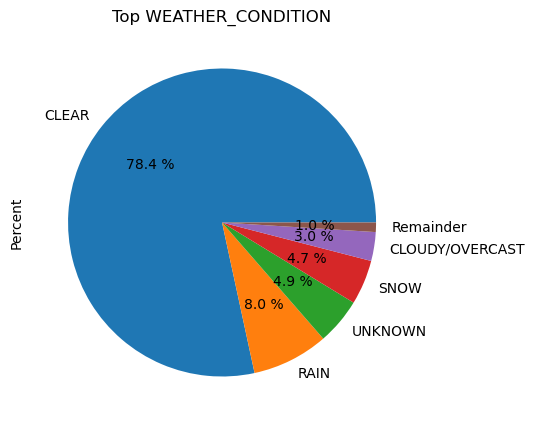

In [253]:
a=('WEATHER_CONDITION')
s=dff_cat[a]

y=s.value_counts(normalize=True)
pies=[]
ylabels=[]
for i in range(len(s.value_counts(normalize=True))):
    if s.value_counts(normalize=True)[i]>.0005:
       pies.append(s.value_counts(normalize=True)[i])
       ylabels.append(y.index.values[i])
       
    
s1 = pd.DataFrame({'Categories': (ylabels),
                   'Percent': pies})
s1.set_index('Categories', inplace=True)
#print(s)
plot = s1.plot.pie(y='Percent', figsize=(5,5), legend=False, autopct='%.1f %%', title=('Top ' +  a))

### Start to Hot encode and scale attributes

In [220]:
dff_cat.columns

Index(['TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I',
       'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 'LONGITUDE', 'LOCATION', 'PERSON_ID', 'PERSON_TYPE',
       'CRASH_RECORD_ID (right)', 'RD_NO (right)', 'VEHICLE_ID',
       'CRASH_DATE (right)', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',
       'DRIVERS_LICENSE_ST

In [221]:
d=['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE', 
       'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I',
       'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'LATITUDE', 'LONGITUDE', 'LOCATION', 'PERSON_ID', 'PERSON_TYPE',
       'CRASH_RECORD_ID (right)', 'RD_NO (right)', 'VEHICLE_ID',
       'CRASH_DATE (right)', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 
       'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT',
       'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'HOSPITAL',
       'EMS_AGENCY', 'DRIVER_ACTION', 'DRIVER_VISION', 'PHYSICAL_CONDITION',
       'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY', 'PEDPEDAL_LOCATION',
       'BAC_RESULT','BAC_RESULT VALUE']
df1 = df.drop(columns=d)
df1

,POSTED_SPEED_LIMIT,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,AGE,Cluster
0,35,0,0,0,0,0,3,0,5,6,3,28.000000,0
1,35,0,0,0,0,0,3,0,5,6,3,27.000000,0
2,30,1,0,0,1,0,3,0,4,6,3,39.270758,0
3,30,0,0,0,0,0,1,0,4,6,3,29.000000,0
4,30,0,0,0,0,0,1,0,5,6,3,58.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248618,30,0,0,0,0,0,7,0,7,6,5,17.000000,3
248619,30,0,0,0,0,0,7,0,7,6,5,8.000000,3
248620,30,0,0,0,0,0,3,0,6,6,5,20.000000,3
248621,30,0,0,0,0,0,3,0,7,6,5,30.000000,3


In [222]:
# preerve orignal numeric
df_num=df1
df_num

,POSTED_SPEED_LIMIT,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,AGE,Cluster
0,35,0,0,0,0,0,3,0,5,6,3,28.000000,0
1,35,0,0,0,0,0,3,0,5,6,3,27.000000,0
2,30,1,0,0,1,0,3,0,4,6,3,39.270758,0
3,30,0,0,0,0,0,1,0,4,6,3,29.000000,0
4,30,0,0,0,0,0,1,0,5,6,3,58.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248618,30,0,0,0,0,0,7,0,7,6,5,17.000000,3
248619,30,0,0,0,0,0,7,0,7,6,5,8.000000,3
248620,30,0,0,0,0,0,3,0,6,6,5,20.000000,3
248621,30,0,0,0,0,0,3,0,7,6,5,30.000000,3


### df1 represents the continuous variables for scaling

In [223]:
cols=df1.columns
cols

Index(['POSTED_SPEED_LIMIT', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'AGE', 'Cluster'],
      dtype='object')

### Normalize countinuous variables

In [224]:
#Normalize countinous variable
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df1)


MinMaxScaler()

In [225]:
# Result of scaling nmerical columns
df1= pd.DataFrame(scaler.fit_transform(df1), columns=cols)
df1

,POSTED_SPEED_LIMIT,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,AGE,Cluster
0,0.500000,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.217391,0.833333,0.181818,0.271845,0.0
1,0.500000,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.217391,0.833333,0.181818,0.262136,0.0
2,0.428571,0.047619,0.0,0.0,0.052632,0.0,0.066667,0.0,0.173913,0.833333,0.181818,0.381269,0.0
3,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.022222,0.0,0.173913,0.833333,0.181818,0.281553,0.0
4,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.022222,0.0,0.217391,0.833333,0.181818,0.563107,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248618,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.155556,0.0,0.304348,0.833333,0.363636,0.165049,1.0
248619,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.155556,0.0,0.304348,0.833333,0.363636,0.077670,1.0
248620,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.260870,0.833333,0.363636,0.194175,1.0
248621,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.304348,0.833333,0.363636,0.291262,1.0


In [226]:
## ave for kmean
df1.to_csv('df1_KM.csv')

### hot_cat are the categorical columns to be used for hot encoding and then merged back with numerical columns

In [227]:
hot_cat=(['TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I',
       'HIT_AND_RUN_I', 'DAMAGE','PRIM_CONTRIBUTORY_CAUSE', 'SEX', 
       'STREET_DIRECTION',  
       'MOST_SEVERE_INJURY'])
len(hot_cat)

19

In [228]:
# Hot Encoding columns

i=0
for i in range(len(hot_cat)):
    new_df = pd.DataFrame(dff_cat, columns=[hot_cat[i]])
    # generate binary values using get_dummies
    dum_df = pd.get_dummies(new_df, columns=[hot_cat[i]], prefix=[hot_cat[i] + ' Type_is'] )
    #merge with main df bridge_df on key values
    dff_cat=dff_cat.join(dum_df)

dff_cat


,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,...,STREET_DIRECTION Type_is_E,STREET_DIRECTION Type_is_N,STREET_DIRECTION Type_is_Remainder,STREET_DIRECTION Type_is_S,STREET_DIRECTION Type_is_W,MOST_SEVERE_INJURY Type_is_INCAPACITATING INJURY,MOST_SEVERE_INJURY Type_is_NO INDICATION OF INJURY,MOST_SEVERE_INJURY Type_is_NONINCAPACITATING INJURY,"MOST_SEVERE_INJURY Type_is_REPORTED, NOT EVIDENT",MOST_SEVERE_INJURY Type_is_Remainder
0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,...,0,1,0,0,0,0,1,0,0,0
1,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,...,0,1,0,0,0,0,1,0,0,0
2,NO CONTROLS,NO CONTROLS,Remainder,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,WET,NO DEFECTS,ON SCENE,...,0,0,0,0,1,0,0,1,0,0
3,NO CONTROLS,UNKNOWN,RAIN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,WET,UNKNOWN,ON SCENE,...,0,0,0,0,1,0,1,0,0,0
4,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ALLEY,STRAIGHT AND LEVEL,WET,NO DEFECTS,ON SCENE,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248618,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,NOT ON SCENE (DESK REPORT),...,0,0,0,1,0,0,1,0,0,0
248619,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,NOT ON SCENE (DESK REPORT),...,0,0,0,1,0,0,1,0,0,0
248620,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,ON SCENE,...,0,0,0,0,1,0,1,0,0,0
248621,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,ANGLE,ALLEY,STRAIGHT AND LEVEL,WET,NO DEFECTS,NOT ON SCENE (DESK REPORT),...,0,0,0,1,0,0,1,0,0,0


### Saving Hot Encode section

In [229]:
dff_cat.to_csv('dff_hot_encoding.csv')


In [230]:
dff_cat.iloc[:,0:64]

,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,...,HOSPITAL,EMS_AGENCY,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE
0,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,...,none,none,NONE,NOT OBSCURED,NORMAL,none,none,none,TEST NOT OFFERED,0.179938
1,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,...,none,none,NONE,NOT OBSCURED,NORMAL,none,none,none,TEST NOT OFFERED,0.179938
2,NO CONTROLS,NO CONTROLS,Remainder,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),STRAIGHT AND LEVEL,WET,NO DEFECTS,ON SCENE,...,none,none,FAILED TO YIELD,UNKNOWN,UNKNOWN,none,none,none,TEST NOT OFFERED,0.179938
3,NO CONTROLS,UNKNOWN,RAIN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,WET,UNKNOWN,ON SCENE,...,none,none,OTHER,UNKNOWN,Remainder,none,none,none,TEST NOT OFFERED,0.179938
4,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ALLEY,STRAIGHT AND LEVEL,WET,NO DEFECTS,ON SCENE,...,none,none,NONE,UNKNOWN,NORMAL,none,none,none,TEST NOT OFFERED,0.179938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248618,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,NOT ON SCENE (DESK REPORT),...,none,none,none,none,none,none,none,none,none,0.179938
248619,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,NOT ON SCENE (DESK REPORT),...,none,none,none,none,none,none,none,none,none,0.179938
248620,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,WET,NO DEFECTS,ON SCENE,...,REFUSED,none,none,none,none,none,none,none,none,0.179938
248621,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,ANGLE,ALLEY,STRAIGHT AND LEVEL,WET,NO DEFECTS,NOT ON SCENE (DESK REPORT),...,REFUSED,none,none,none,none,none,none,none,none,0.179938


### Merge Cat and Numerical data

In [231]:
# create section of hot endcoding to be merged with numerical
dff_hot=dff_cat.iloc[:,64:171]
dff_hot

,TRAFFIC_CONTROL_DEVICE Type_is_NO CONTROLS,TRAFFIC_CONTROL_DEVICE Type_is_Remainder,TRAFFIC_CONTROL_DEVICE Type_is_STOP SIGN/FLASHER,TRAFFIC_CONTROL_DEVICE Type_is_TRAFFIC SIGNAL,TRAFFIC_CONTROL_DEVICE Type_is_UNKNOWN,DEVICE_CONDITION Type_is_FUNCTIONING PROPERLY,DEVICE_CONDITION Type_is_NO CONTROLS,DEVICE_CONDITION Type_is_Remainder,DEVICE_CONDITION Type_is_UNKNOWN,WEATHER_CONDITION Type_is_CLEAR,...,STREET_DIRECTION Type_is_E,STREET_DIRECTION Type_is_N,STREET_DIRECTION Type_is_Remainder,STREET_DIRECTION Type_is_S,STREET_DIRECTION Type_is_W,MOST_SEVERE_INJURY Type_is_INCAPACITATING INJURY,MOST_SEVERE_INJURY Type_is_NO INDICATION OF INJURY,MOST_SEVERE_INJURY Type_is_NONINCAPACITATING INJURY,"MOST_SEVERE_INJURY Type_is_REPORTED, NOT EVIDENT",MOST_SEVERE_INJURY Type_is_Remainder
0,0,0,0,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
1,0,0,0,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0
4,0,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248618,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
248619,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
248620,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
248621,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0


### Merging of numerical and Categorical data

In [232]:
#Join Scaled Numerical and Hot encoder
dff_final=df1.join(dff_hot)
dff_final

,POSTED_SPEED_LIMIT,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,...,STREET_DIRECTION Type_is_E,STREET_DIRECTION Type_is_N,STREET_DIRECTION Type_is_Remainder,STREET_DIRECTION Type_is_S,STREET_DIRECTION Type_is_W,MOST_SEVERE_INJURY Type_is_INCAPACITATING INJURY,MOST_SEVERE_INJURY Type_is_NO INDICATION OF INJURY,MOST_SEVERE_INJURY Type_is_NONINCAPACITATING INJURY,"MOST_SEVERE_INJURY Type_is_REPORTED, NOT EVIDENT",MOST_SEVERE_INJURY Type_is_Remainder
0,0.500000,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.217391,0.833333,...,0,1,0,0,0,0,1,0,0,0
1,0.500000,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.217391,0.833333,...,0,1,0,0,0,0,1,0,0,0
2,0.428571,0.047619,0.0,0.0,0.052632,0.0,0.066667,0.0,0.173913,0.833333,...,0,0,0,0,1,0,0,1,0,0
3,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.022222,0.0,0.173913,0.833333,...,0,0,0,0,1,0,1,0,0,0
4,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.022222,0.0,0.217391,0.833333,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248618,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.155556,0.0,0.304348,0.833333,...,0,0,0,1,0,0,1,0,0,0
248619,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.155556,0.0,0.304348,0.833333,...,0,0,0,1,0,0,1,0,0,0
248620,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.260870,0.833333,...,0,0,0,0,1,0,1,0,0,0
248621,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.304348,0.833333,...,0,0,0,1,0,0,1,0,0,0


### Save File for merged cat and numerical scaling

In [233]:
dff_final.to_csv('dff_final2.csv')

In [234]:
dff_final

,POSTED_SPEED_LIMIT,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,...,STREET_DIRECTION Type_is_E,STREET_DIRECTION Type_is_N,STREET_DIRECTION Type_is_Remainder,STREET_DIRECTION Type_is_S,STREET_DIRECTION Type_is_W,MOST_SEVERE_INJURY Type_is_INCAPACITATING INJURY,MOST_SEVERE_INJURY Type_is_NO INDICATION OF INJURY,MOST_SEVERE_INJURY Type_is_NONINCAPACITATING INJURY,"MOST_SEVERE_INJURY Type_is_REPORTED, NOT EVIDENT",MOST_SEVERE_INJURY Type_is_Remainder
0,0.500000,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.217391,0.833333,...,0,1,0,0,0,0,1,0,0,0
1,0.500000,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.217391,0.833333,...,0,1,0,0,0,0,1,0,0,0
2,0.428571,0.047619,0.0,0.0,0.052632,0.0,0.066667,0.0,0.173913,0.833333,...,0,0,0,0,1,0,0,1,0,0
3,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.022222,0.0,0.173913,0.833333,...,0,0,0,0,1,0,1,0,0,0
4,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.022222,0.0,0.217391,0.833333,...,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248618,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.155556,0.0,0.304348,0.833333,...,0,0,0,1,0,0,1,0,0,0
248619,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.155556,0.0,0.304348,0.833333,...,0,0,0,1,0,0,1,0,0,0
248620,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.260870,0.833333,...,0,0,0,0,1,0,1,0,0,0
248621,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.304348,0.833333,...,0,0,0,1,0,0,1,0,0,0


### Create a version without hot encoding (Kprototype)

In [235]:
#merge ithout hot encoding
for i in range (len(hot_cat)):
    if i==0:
        h=dff_cat[hot_cat[i]]
    else:
        h=pd.concat([dff_cat[hot_cat[i]],h], axis=1)  
dff_final=df1.join(h)
dff_final[0:5]

,POSTED_SPEED_LIMIT,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,...,REPORT_TYPE,ROAD_DEFECT,ROADWAY_SURFACE_COND,ALIGNMENT,TRAFFICWAY_TYPE,FIRST_CRASH_TYPE,LIGHTING_CONDITION,WEATHER_CONDITION,DEVICE_CONDITION,TRAFFIC_CONTROL_DEVICE
0,0.500000,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.217391,0.833333,...,ON SCENE,NO DEFECTS,DRY,STRAIGHT AND LEVEL,DIVIDED - W/MEDIAN (NOT RAISED),TURNING,"DARKNESS, LIGHTED ROAD",CLEAR,FUNCTIONING PROPERLY,TRAFFIC SIGNAL
1,0.500000,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.217391,0.833333,...,ON SCENE,NO DEFECTS,DRY,STRAIGHT AND LEVEL,DIVIDED - W/MEDIAN (NOT RAISED),TURNING,"DARKNESS, LIGHTED ROAD",CLEAR,FUNCTIONING PROPERLY,TRAFFIC SIGNAL
2,0.428571,0.047619,0.0,0.0,0.052632,0.0,0.066667,0.0,0.173913,0.833333,...,ON SCENE,NO DEFECTS,WET,STRAIGHT AND LEVEL,DIVIDED - W/MEDIAN (NOT RAISED),REAR END,"DARKNESS, LIGHTED ROAD",Remainder,NO CONTROLS,NO CONTROLS
3,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.022222,0.0,0.173913,0.833333,...,ON SCENE,UNKNOWN,WET,STRAIGHT AND LEVEL,NOT DIVIDED,PARKED MOTOR VEHICLE,"DARKNESS, LIGHTED ROAD",RAIN,UNKNOWN,NO CONTROLS
4,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.022222,0.0,0.217391,0.833333,...,ON SCENE,NO DEFECTS,WET,STRAIGHT AND LEVEL,ALLEY,PARKED MOTOR VEHICLE,"DARKNESS, LIGHTED ROAD",CLEAR,UNKNOWN,UNKNOWN


In [236]:
# Save non hot encoding version (just categorical columns, can use on Kmode)
dff_final.to_csv('dff_final.csv')

In [237]:
dff_final.isnull().any()

POSTED_SPEED_LIMIT               False
INJURIES_TOTAL                   False
INJURIES_FATAL                   False
INJURIES_INCAPACITATING          False
INJURIES_NON_INCAPACITATING      False
INJURIES_REPORTED_NOT_EVIDENT    False
INJURIES_NO_INDICATION           False
INJURIES_UNKNOWN                 False
CRASH_HOUR                       False
CRASH_DAY_OF_WEEK                False
CRASH_MONTH                      False
AGE                              False
Cluster                          False
MOST_SEVERE_INJURY               False
STREET_DIRECTION                 False
SEX                              False
PRIM_CONTRIBUTORY_CAUSE          False
DAMAGE                           False
HIT_AND_RUN_I                    False
NOT_RIGHT_OF_WAY_I               False
INTERSECTION_RELATED_I           False
CRASH_TYPE                       False
REPORT_TYPE                      False
ROAD_DEFECT                      False
ROADWAY_SURFACE_COND             False
ALIGNMENT                

In [30]:
# kmode verion
df_KM=dff_final.iloc[0:,12:]
df_KM

,MOST_SEVERE_INJURY,STREET_DIRECTION,SEX,PRIM_CONTRIBUTORY_CAUSE,DAMAGE,HIT_AND_RUN_I,NOT_RIGHT_OF_WAY_I,INTERSECTION_RELATED_I,CRASH_TYPE,REPORT_TYPE,ROAD_DEFECT,ROADWAY_SURFACE_COND,ALIGNMENT,TRAFFICWAY_TYPE,FIRST_CRASH_TYPE,LIGHTING_CONDITION,WEATHER_CONDITION,DEVICE_CONDITION,TRAFFIC_CONTROL_DEVICE
0,NO INDICATION OF INJURY,N,M,FAILING TO YIELD RIGHT-OF-WAY,"OVER $1,500",none,none,Y,INJURY AND / OR TOW DUE TO CRASH,ON SCENE,NO DEFECTS,DRY,STRAIGHT AND LEVEL,DIVIDED - W/MEDIAN (NOT RAISED),TURNING,"DARKNESS, LIGHTED ROAD",CLEAR,FUNCTIONING PROPERLY,TRAFFIC SIGNAL
1,NO INDICATION OF INJURY,N,M,FAILING TO YIELD RIGHT-OF-WAY,"OVER $1,500",none,none,Y,INJURY AND / OR TOW DUE TO CRASH,ON SCENE,NO DEFECTS,DRY,STRAIGHT AND LEVEL,DIVIDED - W/MEDIAN (NOT RAISED),TURNING,"DARKNESS, LIGHTED ROAD",CLEAR,FUNCTIONING PROPERLY,TRAFFIC SIGNAL
2,NONINCAPACITATING INJURY,W,X,FOLLOWING TOO CLOSELY,"OVER $1,500",Y,none,none,INJURY AND / OR TOW DUE TO CRASH,ON SCENE,NO DEFECTS,WET,STRAIGHT AND LEVEL,DIVIDED - W/MEDIAN (NOT RAISED),REAR END,"DARKNESS, LIGHTED ROAD",Remainder,NO CONTROLS,NO CONTROLS
3,NO INDICATION OF INJURY,W,F,Remainder,"OVER $1,500",none,none,none,INJURY AND / OR TOW DUE TO CRASH,ON SCENE,UNKNOWN,WET,STRAIGHT AND LEVEL,NOT DIVIDED,PARKED MOTOR VEHICLE,"DARKNESS, LIGHTED ROAD",RAIN,UNKNOWN,NO CONTROLS
4,NO INDICATION OF INJURY,N,M,UNABLE TO DETERMINE,$500 OR LESS,none,none,none,NO INJURY / DRIVE AWAY,ON SCENE,NO DEFECTS,WET,STRAIGHT AND LEVEL,ALLEY,PARKED MOTOR VEHICLE,"DARKNESS, LIGHTED ROAD",CLEAR,UNKNOWN,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248618,NO INDICATION OF INJURY,S,M,UNABLE TO DETERMINE,"OVER $1,500",none,none,Y,NO INJURY / DRIVE AWAY,NOT ON SCENE (DESK REPORT),NO DEFECTS,WET,STRAIGHT AND LEVEL,NOT DIVIDED,TURNING,DAYLIGHT,RAIN,FUNCTIONING PROPERLY,STOP SIGN/FLASHER
248619,NO INDICATION OF INJURY,S,M,UNABLE TO DETERMINE,"OVER $1,500",none,none,Y,NO INJURY / DRIVE AWAY,NOT ON SCENE (DESK REPORT),NO DEFECTS,WET,STRAIGHT AND LEVEL,NOT DIVIDED,TURNING,DAYLIGHT,RAIN,FUNCTIONING PROPERLY,STOP SIGN/FLASHER
248620,NO INDICATION OF INJURY,W,F,FOLLOWING TOO CLOSELY,"OVER $1,500",none,none,Y,NO INJURY / DRIVE AWAY,ON SCENE,NO DEFECTS,WET,STRAIGHT AND LEVEL,NOT DIVIDED,TURNING,DAYLIGHT,RAIN,FUNCTIONING PROPERLY,STOP SIGN/FLASHER
248621,NO INDICATION OF INJURY,S,M,FAILING TO YIELD RIGHT-OF-WAY,"OVER $1,500",none,none,none,NO INJURY / DRIVE AWAY,NOT ON SCENE (DESK REPORT),NO DEFECTS,WET,STRAIGHT AND LEVEL,ALLEY,ANGLE,DAYLIGHT,RAIN,NO CONTROLS,NO CONTROLS


### Ready for Clustering Method Evaluation

### dff_final2 is scaled numerical and hot encoding (GMM application and DBSCAN)
### dff_final is scaled numerical and non_hot encoding (kprototype application)
### df1_KM is scaled numerical only (kmean only)
### df_KM is non hot categorical  (kmodes)

In [179]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

#### Kmodes Modeling (use dff_hot version)

This will take hours to run. skip over as needed

In [196]:
df_KM

,MOST_SEVERE_INJURY,STREET_DIRECTION,SEX,PRIM_CONTRIBUTORY_CAUSE,DAMAGE,HIT_AND_RUN_I,NOT_RIGHT_OF_WAY_I,INTERSECTION_RELATED_I,CRASH_TYPE,REPORT_TYPE,ROAD_DEFECT,ROADWAY_SURFACE_COND,ALIGNMENT,TRAFFICWAY_TYPE,FIRST_CRASH_TYPE,LIGHTING_CONDITION,WEATHER_CONDITION,DEVICE_CONDITION,TRAFFIC_CONTROL_DEVICE,Cluster
0,NO INDICATION OF INJURY,N,M,FAILING TO YIELD RIGHT-OF-WAY,"OVER $1,500",none,none,Y,INJURY AND / OR TOW DUE TO CRASH,ON SCENE,NO DEFECTS,DRY,STRAIGHT AND LEVEL,DIVIDED - W/MEDIAN (NOT RAISED),TURNING,"DARKNESS, LIGHTED ROAD",CLEAR,FUNCTIONING PROPERLY,TRAFFIC SIGNAL,0
1,NO INDICATION OF INJURY,N,M,FAILING TO YIELD RIGHT-OF-WAY,"OVER $1,500",none,none,Y,INJURY AND / OR TOW DUE TO CRASH,ON SCENE,NO DEFECTS,DRY,STRAIGHT AND LEVEL,DIVIDED - W/MEDIAN (NOT RAISED),TURNING,"DARKNESS, LIGHTED ROAD",CLEAR,FUNCTIONING PROPERLY,TRAFFIC SIGNAL,0
2,NONINCAPACITATING INJURY,W,X,FOLLOWING TOO CLOSELY,"OVER $1,500",Y,none,none,INJURY AND / OR TOW DUE TO CRASH,ON SCENE,NO DEFECTS,WET,STRAIGHT AND LEVEL,DIVIDED - W/MEDIAN (NOT RAISED),REAR END,"DARKNESS, LIGHTED ROAD",Remainder,NO CONTROLS,NO CONTROLS,0
3,NO INDICATION OF INJURY,W,F,Remainder,"OVER $1,500",none,none,none,INJURY AND / OR TOW DUE TO CRASH,ON SCENE,UNKNOWN,WET,STRAIGHT AND LEVEL,NOT DIVIDED,PARKED MOTOR VEHICLE,"DARKNESS, LIGHTED ROAD",RAIN,UNKNOWN,NO CONTROLS,0
4,NO INDICATION OF INJURY,N,M,UNABLE TO DETERMINE,$500 OR LESS,none,none,none,NO INJURY / DRIVE AWAY,ON SCENE,NO DEFECTS,WET,STRAIGHT AND LEVEL,ALLEY,PARKED MOTOR VEHICLE,"DARKNESS, LIGHTED ROAD",CLEAR,UNKNOWN,UNKNOWN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248618,NO INDICATION OF INJURY,S,M,UNABLE TO DETERMINE,"OVER $1,500",none,none,Y,NO INJURY / DRIVE AWAY,NOT ON SCENE (DESK REPORT),NO DEFECTS,WET,STRAIGHT AND LEVEL,NOT DIVIDED,TURNING,DAYLIGHT,RAIN,FUNCTIONING PROPERLY,STOP SIGN/FLASHER,0
248619,NO INDICATION OF INJURY,S,M,UNABLE TO DETERMINE,"OVER $1,500",none,none,Y,NO INJURY / DRIVE AWAY,NOT ON SCENE (DESK REPORT),NO DEFECTS,WET,STRAIGHT AND LEVEL,NOT DIVIDED,TURNING,DAYLIGHT,RAIN,FUNCTIONING PROPERLY,STOP SIGN/FLASHER,0
248620,NO INDICATION OF INJURY,W,F,FOLLOWING TOO CLOSELY,"OVER $1,500",none,none,Y,NO INJURY / DRIVE AWAY,ON SCENE,NO DEFECTS,WET,STRAIGHT AND LEVEL,NOT DIVIDED,TURNING,DAYLIGHT,RAIN,FUNCTIONING PROPERLY,STOP SIGN/FLASHER,0
248621,NO INDICATION OF INJURY,S,M,FAILING TO YIELD RIGHT-OF-WAY,"OVER $1,500",none,none,none,NO INJURY / DRIVE AWAY,NOT ON SCENE (DESK REPORT),NO DEFECTS,WET,STRAIGHT AND LEVEL,ALLEY,ANGLE,DAYLIGHT,RAIN,NO CONTROLS,NO CONTROLS,3


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 1753551.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 1753551.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 1753551.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 1753551.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 1753551.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 70518, cost: 1567786.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 85225, cost: 1618547.0
Run 2, iteration: 2/100, moves: 25112, cost: 1618547.

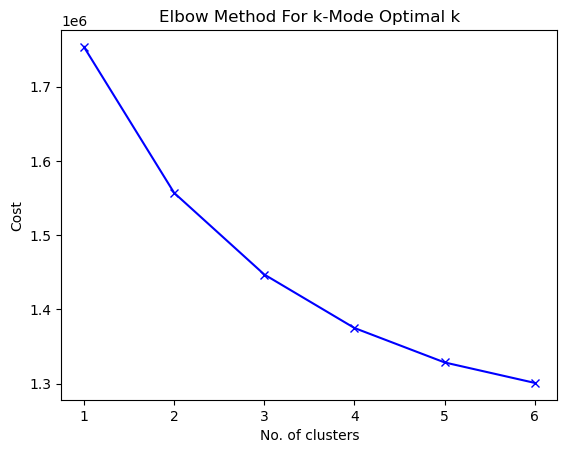

In [259]:
# Elbow curve to find optimal K
cost = []
K = range(1,7)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(df_KM)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For k-Mode Optimal k')
plt.show()

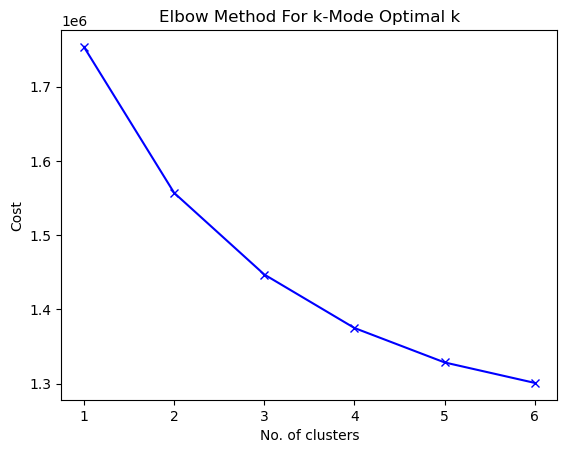

In [260]:
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For k-Mode Optimal k')
plt.show()

In [157]:
import numpy as np
from kmodes.kmodes import KModes

# random categorical data
#data = np.random.choice(20, (100, 10))

km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(dff_final)

# Print the cluster centroids
print(km.cluster_centroids_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 95713, cost: 2534733.0
Run 1, iteration: 2/100, moves: 18629, cost: 2534733.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 100830, cost: 2502005.0
Run 2, iteration: 2/100, moves: 21331, cost: 2496636.0
Run 2, iteration: 3/100, moves: 3600, cost: 2496636.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 119050, cost: 2536896.0
Run 3, iteration: 2/100, moves: 21441, cost: 2536896.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 80013, cost: 2516595.0
Run 4, iteration: 2/100, moves: 16431, cost: 2516595.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 90951, cost: 2542813.0
Run 5, iteration: 2/100, moves: 45484, cost: 2542

In [255]:
h=pd.DataFrame(clusters)
h.value_counts(normalize=True)

0    0.321036
2    0.304710
3    0.233993
1    0.140261
dtype: float64

In [197]:
df_num

,POSTED_SPEED_LIMIT,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,AGE,Cluster
0,35,0,0,0,0,0,3,0,5,6,3,28.000000,0
1,35,0,0,0,0,0,3,0,5,6,3,27.000000,0
2,30,1,0,0,1,0,3,0,4,6,3,39.270758,0
3,30,0,0,0,0,0,1,0,4,6,3,29.000000,0
4,30,0,0,0,0,0,1,0,5,6,3,58.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248618,30,0,0,0,0,0,7,0,7,6,5,17.000000,3
248619,30,0,0,0,0,0,7,0,7,6,5,8.000000,3
248620,30,0,0,0,0,0,3,0,6,6,5,20.000000,3
248621,30,0,0,0,0,0,3,0,7,6,5,30.000000,3


In [159]:
df_KM['Cluster']=clusters
df_KM

#Save new cluster to computer for k-Mean
df_KM.to_csv('df_kmode.csv')


In [160]:
df_KM[0:5]

,MOST_SEVERE_INJURY,STREET_DIRECTION,SEX,PRIM_CONTRIBUTORY_CAUSE,DAMAGE,HIT_AND_RUN_I,NOT_RIGHT_OF_WAY_I,INTERSECTION_RELATED_I,CRASH_TYPE,REPORT_TYPE,ROAD_DEFECT,ROADWAY_SURFACE_COND,ALIGNMENT,TRAFFICWAY_TYPE,FIRST_CRASH_TYPE,LIGHTING_CONDITION,WEATHER_CONDITION,DEVICE_CONDITION,TRAFFIC_CONTROL_DEVICE,Cluster
0,NO INDICATION OF INJURY,N,M,FAILING TO YIELD RIGHT-OF-WAY,"OVER $1,500",none,none,Y,INJURY AND / OR TOW DUE TO CRASH,ON SCENE,NO DEFECTS,DRY,STRAIGHT AND LEVEL,DIVIDED - W/MEDIAN (NOT RAISED),TURNING,"DARKNESS, LIGHTED ROAD",CLEAR,FUNCTIONING PROPERLY,TRAFFIC SIGNAL,0
1,NO INDICATION OF INJURY,N,M,FAILING TO YIELD RIGHT-OF-WAY,"OVER $1,500",none,none,Y,INJURY AND / OR TOW DUE TO CRASH,ON SCENE,NO DEFECTS,DRY,STRAIGHT AND LEVEL,DIVIDED - W/MEDIAN (NOT RAISED),TURNING,"DARKNESS, LIGHTED ROAD",CLEAR,FUNCTIONING PROPERLY,TRAFFIC SIGNAL,0
2,NONINCAPACITATING INJURY,W,X,FOLLOWING TOO CLOSELY,"OVER $1,500",Y,none,none,INJURY AND / OR TOW DUE TO CRASH,ON SCENE,NO DEFECTS,WET,STRAIGHT AND LEVEL,DIVIDED - W/MEDIAN (NOT RAISED),REAR END,"DARKNESS, LIGHTED ROAD",Remainder,NO CONTROLS,NO CONTROLS,0
3,NO INDICATION OF INJURY,W,F,Remainder,"OVER $1,500",none,none,none,INJURY AND / OR TOW DUE TO CRASH,ON SCENE,UNKNOWN,WET,STRAIGHT AND LEVEL,NOT DIVIDED,PARKED MOTOR VEHICLE,"DARKNESS, LIGHTED ROAD",RAIN,UNKNOWN,NO CONTROLS,0
4,NO INDICATION OF INJURY,N,M,UNABLE TO DETERMINE,$500 OR LESS,none,none,none,NO INJURY / DRIVE AWAY,ON SCENE,NO DEFECTS,WET,STRAIGHT AND LEVEL,ALLEY,PARKED MOTOR VEHICLE,"DARKNESS, LIGHTED ROAD",CLEAR,UNKNOWN,UNKNOWN,0


### Kprototype

In [180]:

dff_cat=dff_cat.iloc[0:5,4:68]

In [181]:
# After removing small categories
dff_final2= pd.read_csv('dff_final.csv')
pd.DataFrame(dff_final)
dff_final

,POSTED_SPEED_LIMIT,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,...,REPORT_TYPE,ROAD_DEFECT,ROADWAY_SURFACE_COND,ALIGNMENT,TRAFFICWAY_TYPE,FIRST_CRASH_TYPE,LIGHTING_CONDITION,WEATHER_CONDITION,DEVICE_CONDITION,TRAFFIC_CONTROL_DEVICE
0,0.500000,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.217391,0.833333,...,ON SCENE,NO DEFECTS,DRY,STRAIGHT AND LEVEL,DIVIDED - W/MEDIAN (NOT RAISED),TURNING,"DARKNESS, LIGHTED ROAD",CLEAR,FUNCTIONING PROPERLY,TRAFFIC SIGNAL
1,0.500000,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.217391,0.833333,...,ON SCENE,NO DEFECTS,DRY,STRAIGHT AND LEVEL,DIVIDED - W/MEDIAN (NOT RAISED),TURNING,"DARKNESS, LIGHTED ROAD",CLEAR,FUNCTIONING PROPERLY,TRAFFIC SIGNAL
2,0.428571,0.047619,0.0,0.0,0.052632,0.0,0.066667,0.0,0.173913,0.833333,...,ON SCENE,NO DEFECTS,WET,STRAIGHT AND LEVEL,DIVIDED - W/MEDIAN (NOT RAISED),REAR END,"DARKNESS, LIGHTED ROAD",Remainder,NO CONTROLS,NO CONTROLS
3,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.022222,0.0,0.173913,0.833333,...,ON SCENE,UNKNOWN,WET,STRAIGHT AND LEVEL,NOT DIVIDED,PARKED MOTOR VEHICLE,"DARKNESS, LIGHTED ROAD",RAIN,UNKNOWN,NO CONTROLS
4,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.022222,0.0,0.217391,0.833333,...,ON SCENE,NO DEFECTS,WET,STRAIGHT AND LEVEL,ALLEY,PARKED MOTOR VEHICLE,"DARKNESS, LIGHTED ROAD",CLEAR,UNKNOWN,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248618,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.155556,0.0,0.304348,0.833333,...,NOT ON SCENE (DESK REPORT),NO DEFECTS,WET,STRAIGHT AND LEVEL,NOT DIVIDED,TURNING,DAYLIGHT,RAIN,FUNCTIONING PROPERLY,STOP SIGN/FLASHER
248619,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.155556,0.0,0.304348,0.833333,...,NOT ON SCENE (DESK REPORT),NO DEFECTS,WET,STRAIGHT AND LEVEL,NOT DIVIDED,TURNING,DAYLIGHT,RAIN,FUNCTIONING PROPERLY,STOP SIGN/FLASHER
248620,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.260870,0.833333,...,ON SCENE,NO DEFECTS,WET,STRAIGHT AND LEVEL,NOT DIVIDED,TURNING,DAYLIGHT,RAIN,FUNCTIONING PROPERLY,STOP SIGN/FLASHER
248621,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.304348,0.833333,...,NOT ON SCENE (DESK REPORT),NO DEFECTS,WET,STRAIGHT AND LEVEL,ALLEY,ANGLE,DAYLIGHT,RAIN,NO CONTROLS,NO CONTROLS


In [182]:
# Define Category indee
#dff_final2
kcol=list(range(11,31))
#kcol

In [421]:
### Takes over 14 hours to elbow chart below

7


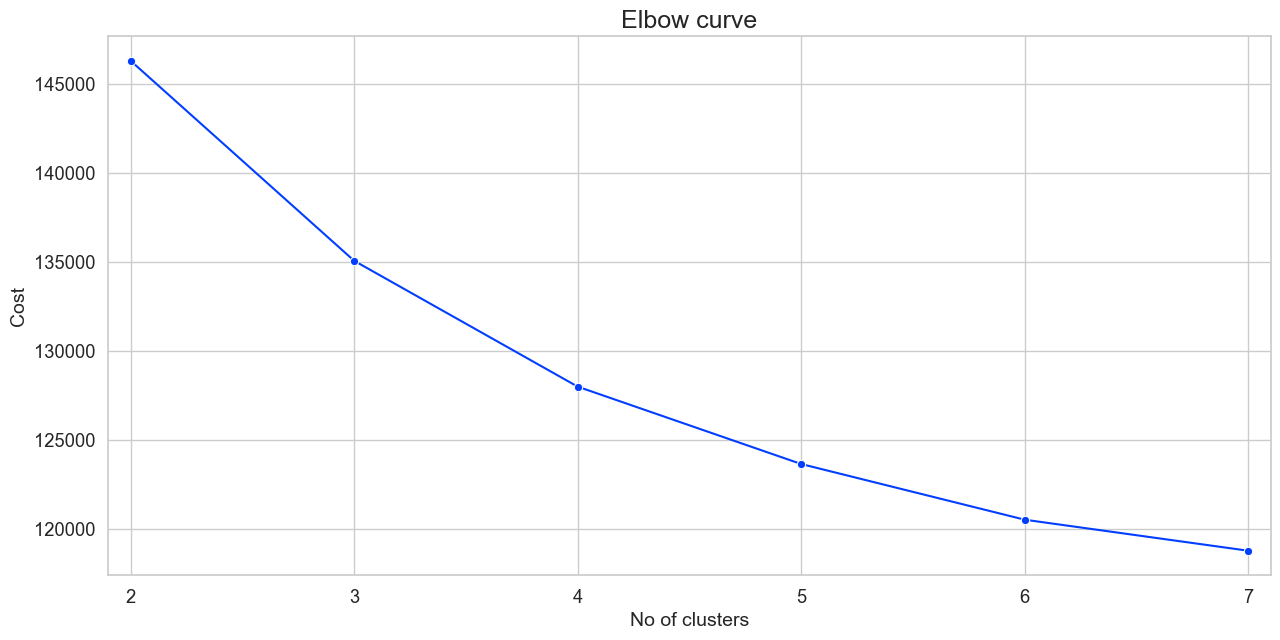

In [414]:
# Function for plotting elbow curve
def plot_elbow_curve(start, end, data):
        no_of_clusters = list(range(start, end+1))
        cost_values = []

        for k in no_of_clusters:
                test_model = KPrototypes(n_clusters=k, init='Huang', random_state=42)
                test_model.fit_predict(data, categorical=kcol)
                cost_values.append(test_model.cost_)

        sns.set_theme(style="whitegrid", palette="bright", font_scale=1.2)

        plt.figure(figsize=(15, 7))
        ax = sns.lineplot(x=no_of_clusters, y=cost_values, marker="o", dashes=False)
        ax.set_title('Elbow curve', fontsize=18)
        ax.set_xlabel('No of clusters', fontsize=14)
        ax.set_ylabel('Cost', fontsize=14)
        ax.set(xlim=(start-0.1, end+0.1))
        plt.plot();
        print(k)
# Plotting elbow curve for k=2 to k=10
plot_elbow_curve(2,7,dff_final)

In [183]:
kp_4 = KPrototypes(n_clusters=4, init='Huang', random_state=42, n_jobs=-1)
kp_4.fit_predict(dff_final, categorical=kcol)
print(kp_4.cost_)#new column for cluster labels associated with each subject
#dffX['Cluster'] = kp_4.labels_

127989.47026744859


In [238]:
## for numeric verion
df_num['Clusters']=kp_4.labels_
df_num

,POSTED_SPEED_LIMIT,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,AGE,Cluster,Clusters
0,35,0,0,0,0,0,3,0,5,6,3,28.000000,0,2
1,35,0,0,0,0,0,3,0,5,6,3,27.000000,0,2
2,30,1,0,0,1,0,3,0,4,6,3,39.270758,0,2
3,30,0,0,0,0,0,1,0,4,6,3,29.000000,0,2
4,30,0,0,0,0,0,1,0,5,6,3,58.000000,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248618,30,0,0,0,0,0,7,0,7,6,5,17.000000,3,2
248619,30,0,0,0,0,0,7,0,7,6,5,8.000000,3,2
248620,30,0,0,0,0,0,3,0,6,6,5,20.000000,3,2
248621,30,0,0,0,0,0,3,0,7,6,5,30.000000,3,2


In [239]:
#Save new cluster to computer for k-Prototype
df_num.to_csv('df_num_KP.csv')

In [258]:
h=pd.DataFrame(kp_4.labels_)
h.value_counts(normalize=True)

2    0.284053
1    0.274367
3    0.235401
0    0.206180
dtype: float64

In [184]:
dff_final['Clusters']=kp_4.labels_
dff_final

#Save new cluster to computer for k-Mean
#dff_final.to_csv('dff_final.csv')


,POSTED_SPEED_LIMIT,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,...,ROAD_DEFECT,ROADWAY_SURFACE_COND,ALIGNMENT,TRAFFICWAY_TYPE,FIRST_CRASH_TYPE,LIGHTING_CONDITION,WEATHER_CONDITION,DEVICE_CONDITION,TRAFFIC_CONTROL_DEVICE,Clusters
0,0.500000,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.217391,0.833333,...,NO DEFECTS,DRY,STRAIGHT AND LEVEL,DIVIDED - W/MEDIAN (NOT RAISED),TURNING,"DARKNESS, LIGHTED ROAD",CLEAR,FUNCTIONING PROPERLY,TRAFFIC SIGNAL,2
1,0.500000,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.217391,0.833333,...,NO DEFECTS,DRY,STRAIGHT AND LEVEL,DIVIDED - W/MEDIAN (NOT RAISED),TURNING,"DARKNESS, LIGHTED ROAD",CLEAR,FUNCTIONING PROPERLY,TRAFFIC SIGNAL,2
2,0.428571,0.047619,0.0,0.0,0.052632,0.0,0.066667,0.0,0.173913,0.833333,...,NO DEFECTS,WET,STRAIGHT AND LEVEL,DIVIDED - W/MEDIAN (NOT RAISED),REAR END,"DARKNESS, LIGHTED ROAD",Remainder,NO CONTROLS,NO CONTROLS,2
3,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.022222,0.0,0.173913,0.833333,...,UNKNOWN,WET,STRAIGHT AND LEVEL,NOT DIVIDED,PARKED MOTOR VEHICLE,"DARKNESS, LIGHTED ROAD",RAIN,UNKNOWN,NO CONTROLS,2
4,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.022222,0.0,0.217391,0.833333,...,NO DEFECTS,WET,STRAIGHT AND LEVEL,ALLEY,PARKED MOTOR VEHICLE,"DARKNESS, LIGHTED ROAD",CLEAR,UNKNOWN,UNKNOWN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248618,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.155556,0.0,0.304348,0.833333,...,NO DEFECTS,WET,STRAIGHT AND LEVEL,NOT DIVIDED,TURNING,DAYLIGHT,RAIN,FUNCTIONING PROPERLY,STOP SIGN/FLASHER,2
248619,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.155556,0.0,0.304348,0.833333,...,NO DEFECTS,WET,STRAIGHT AND LEVEL,NOT DIVIDED,TURNING,DAYLIGHT,RAIN,FUNCTIONING PROPERLY,STOP SIGN/FLASHER,2
248620,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.260870,0.833333,...,NO DEFECTS,WET,STRAIGHT AND LEVEL,NOT DIVIDED,TURNING,DAYLIGHT,RAIN,FUNCTIONING PROPERLY,STOP SIGN/FLASHER,2
248621,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.304348,0.833333,...,NO DEFECTS,WET,STRAIGHT AND LEVEL,ALLEY,ANGLE,DAYLIGHT,RAIN,NO CONTROLS,NO CONTROLS,2


In [185]:
#Save new cluster to computer for k-Prototype
dff_final.to_csv('dff_final_KP.csv')

### DBSCAN



In [267]:
# After removing small categories
df1_KM= pd.read_csv('df1_KM.csv')
pd.DataFrame(df1_KM)
df1_KM

,Unnamed: 0,POSTED_SPEED_LIMIT,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,AGE,Cluster
0,0,0.500000,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.217391,0.833333,0.181818,0.271845,0.0
1,1,0.500000,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.217391,0.833333,0.181818,0.262136,0.0
2,2,0.428571,0.047619,0.0,0.0,0.052632,0.0,0.066667,0.0,0.173913,0.833333,0.181818,0.381269,0.0
3,3,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.022222,0.0,0.173913,0.833333,0.181818,0.281553,0.0
4,4,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.022222,0.0,0.217391,0.833333,0.181818,0.563107,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248618,248618,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.155556,0.0,0.304348,0.833333,0.363636,0.165049,1.0
248619,248619,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.155556,0.0,0.304348,0.833333,0.363636,0.077670,1.0
248620,248620,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.260870,0.833333,0.363636,0.194175,1.0
248621,248621,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.304348,0.833333,0.363636,0.291262,1.0


In [268]:
df1_KM.shape

(248623, 14)

In [269]:
d=df1_KM

In [273]:
from sklearn.neighbors import NearestNeighbors
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros) 
nbrs = NearestNeighbors(n_neighbors =10).fit(d)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(d)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

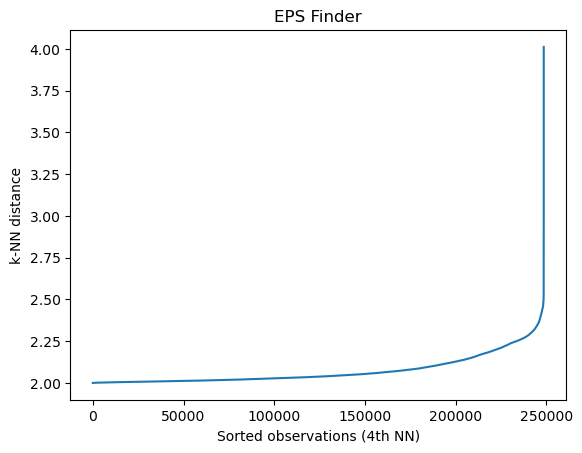

In [274]:
# Find Epilon or noise level range to consider
import matplotlib.pyplot as plt
k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.title("EPS Finder")
plt.show()


In [39]:
from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee points

In [83]:
from sklearn.cluster import DBSCAN
#c=[]
#for i in range(50):
#i=i+1
db = DBSCAN(eps=14.02, min_samples=28).fit(d)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
#c.append(n_clusters_)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 4
Estimated number of noise points: 0


In [74]:
c

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 398,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [84]:
from collections import Counter
Counter(labels)

Counter({0: 174816, 1: 15585, 2: 14810, 3: 43412})

In [259]:
h=pd.DataFrame(labels)
h.value_counts(normalize=True)

0    0.703137
3    0.174610
1    0.062685
2    0.059568
dtype: float64

In [85]:
pred=db.fit_predict(d) 

In [88]:
a=df_num

a['Cluster']=pred
a   #d_dbsn

,POSTED_SPEED_LIMIT,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,AGE,Cluster
0,35,0,0,0,0,0,3,0,5,6,3,28.000000,0
1,35,0,0,0,0,0,3,0,5,6,3,27.000000,0
2,30,1,0,0,1,0,3,0,4,6,3,39.270758,0
3,30,0,0,0,0,0,1,0,4,6,3,29.000000,0
4,30,0,0,0,0,0,1,0,5,6,3,58.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248618,30,0,0,0,0,0,7,0,7,6,5,17.000000,3
248619,30,0,0,0,0,0,7,0,7,6,5,8.000000,3
248620,30,0,0,0,0,0,3,0,6,6,5,20.000000,3
248621,30,0,0,0,0,0,3,0,7,6,5,30.000000,3


In [97]:
#Save new cluster to computer for k-Mean
a.to_csv('df_cluster_dbsn.csv')



### Kmeans exploring clusters 1-11

In [275]:
# After removing small categories
df1_KM= pd.read_csv('df1_KM.csv')
pd.DataFrame(df1_KM)
df1_KM

,Unnamed: 0,POSTED_SPEED_LIMIT,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,AGE,Cluster
0,0,0.500000,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.217391,0.833333,0.181818,0.271845,0.0
1,1,0.500000,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.217391,0.833333,0.181818,0.262136,0.0
2,2,0.428571,0.047619,0.0,0.0,0.052632,0.0,0.066667,0.0,0.173913,0.833333,0.181818,0.381269,0.0
3,3,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.022222,0.0,0.173913,0.833333,0.181818,0.281553,0.0
4,4,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.022222,0.0,0.217391,0.833333,0.181818,0.563107,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248618,248618,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.155556,0.0,0.304348,0.833333,0.363636,0.165049,1.0
248619,248619,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.155556,0.0,0.304348,0.833333,0.363636,0.077670,1.0
248620,248620,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.260870,0.833333,0.363636,0.194175,1.0
248621,248621,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.304348,0.833333,0.363636,0.291262,1.0


In [62]:

#Find optimum number of cluster range 1-10
sse = [] #SUM OF SQUARED ERROR
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(df1_KM)
    sse.append(km.inertia_)


c:\Users\mhodg\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mhodg\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mhodg\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mhodg\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\mhodg\anaconda4\Lib\site-packages\sklearn\clust

### Create an Elbow Chart to determine best cluster # choice

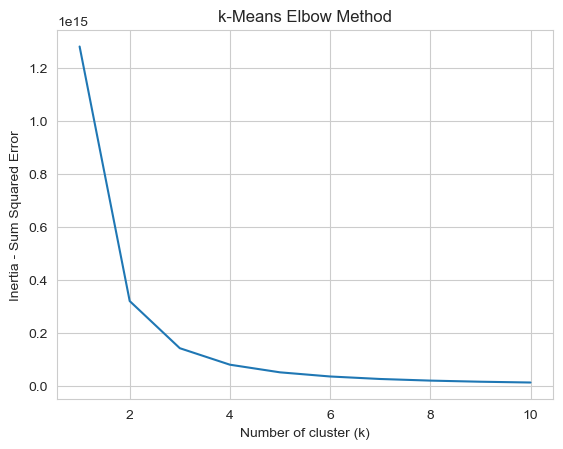

In [63]:
import seaborn as sns
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)
 
g.set(xlabel ="Number of cluster (k)", 
      ylabel = "Inertia - Sum Squared Error", 
      title ='k-Means Elbow Method')
 
plt.show()


### From Chart above we pick 4 clusters and below get there cluster centers with 6 clusters

In [260]:

kmeans = KMeans(n_clusters = 4, random_state = 2)
kmeans.fit(df1_KM)


c:\Users\mhodg\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=2)

In [65]:
kmeans.cluster_centers_[0]

array([3.12520000e+04, 4.11250071e-01, 1.08958902e-02, 4.58629976e-04,
       3.95968323e-03, 6.99480884e-03, 8.84729222e-03, 4.74372717e-02,
       0.00000000e+00, 5.86345440e-01, 5.17411940e-01, 2.27226913e-01,
       3.82476019e-01])

In [262]:
# predict the cluster on the dataset
pred = kmeans.fit_predict(df1_KM)
print(pred)


c:\Users\mhodg\anaconda4\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 ... 1 1 1]


#### we add Cluster to the original file we started with, this will be helpful to identify how the kmeans seperated each attribute

In [263]:
h=pd.DataFrame(pred)
h.value_counts(normalize=True)

0    0.250665
2    0.250009
1    0.249711
3    0.249615
dtype: float64

In [83]:
df_num['Clusters'] = pred
df_num

,POSTED_SPEED_LIMIT,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,AGE,Clusters
0,35,0,0,0,0,0,3,0,5,6,3,28.000000,0
1,35,0,0,0,0,0,3,0,5,6,3,27.000000,0
2,30,1,0,0,1,0,3,0,4,6,3,39.270758,0
3,30,0,0,0,0,0,1,0,4,6,3,29.000000,0
4,30,0,0,0,0,0,1,0,5,6,3,58.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248618,30,0,0,0,0,0,7,0,7,6,5,17.000000,1
248619,30,0,0,0,0,0,7,0,7,6,5,8.000000,1
248620,30,0,0,0,0,0,3,0,6,6,5,20.000000,1
248621,30,0,0,0,0,0,3,0,7,6,5,30.000000,1


In [84]:
#Save new cluster to computer for k-mean
df_num.to_csv('df_num_km.csv')

### Gaussian mixture

In [117]:

dff_final2


,Unnamed: 0,POSTED_SPEED_LIMIT,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,AGE,Cluster
0,0,0.500000,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.217391,0.833333,0.181818,0.271845,0
1,1,0.500000,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.217391,0.833333,0.181818,0.262136,0
2,2,0.428571,0.047619,0.0,0.0,0.052632,0.0,0.066667,0.0,0.173913,0.833333,0.181818,0.381269,0
3,3,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.022222,0.0,0.173913,0.833333,0.181818,0.281553,0
4,4,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.022222,0.0,0.217391,0.833333,0.181818,0.563107,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248618,248618,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.155556,0.0,0.304348,0.833333,0.363636,0.165049,3
248619,248619,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.155556,0.0,0.304348,0.833333,0.363636,0.077670,3
248620,248620,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.260870,0.833333,0.363636,0.194175,3
248621,248621,0.428571,0.000000,0.0,0.0,0.000000,0.0,0.066667,0.0,0.304348,0.833333,0.363636,0.291262,3


In [118]:
from sklearn.mixture import GaussianMixture
from scipy.spatial.distance import cdist

def elbow_report(X):
    aic_k=[]
    bic_k=[]
    n_clusters = range(2,8)
    for n_cluster in n_clusters:
        gmm = GaussianMixture(n_components=n_cluster)
        gmm.fit(X)
        aic_k.append(gmm.aic(X))
        bic_k.append(gmm.bic(X))
    plt.plot(n_clusters,aic_k,'bx-', label='AIC')
    plt.plot(n_clusters,bic_k,'r-', label='BIC')
    plt.xlabel('Number of Clusters') 
    plt.ylabel('AIC and BIC') 
    plt.title('GMM Clustering for n_cluster=2 to 8')
    plt.legend()
    plt.show()

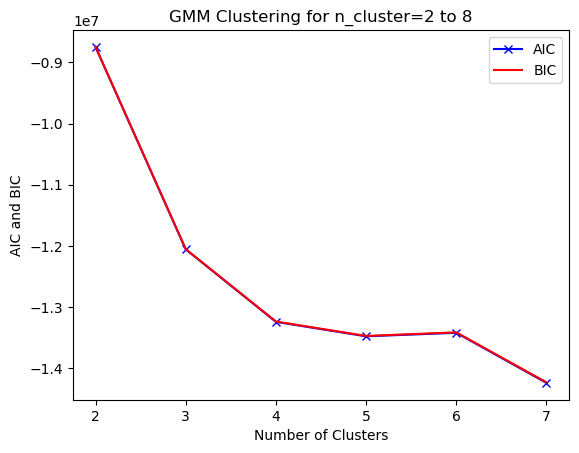

In [119]:
elbow_report(dff_final2)

In [120]:
gmm = GaussianMixture(n_components=4)
gmm_pred=gmm.fit(dff_final2)

In [121]:
gmm_pred
gmm_pred = gmm_pred.fit_predict(dff_final2)

In [122]:
gmm_pred

array([3, 3, 0, ..., 1, 1, 1], dtype=int64)

In [264]:
h=pd.DataFrame(gmm_pred)
h.value_counts(normalize=True)

3    0.582106
1    0.282383
0    0.118448
2    0.017062
dtype: float64

In [144]:
dff_cat['Cluster'] = pred
dff_cat

,Unnamed: 0,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,EMS_AGENCY,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,Cluster
0,0,bca52a367d2f053f3a338c9199261b11b245fb00db3b9e...,JF185730,3/25/2022 5:10,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,...,none,NONE,NOT OBSCURED,NORMAL,none,none,none,TEST NOT OFFERED,0.179938,0
1,1,bca52a367d2f053f3a338c9199261b11b245fb00db3b9e...,JF185730,3/25/2022 5:10,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,...,none,NONE,NOT OBSCURED,NORMAL,none,none,none,TEST NOT OFFERED,0.179938,0
2,2,91a50c583a041e524a0807626ebcc57cc302a97270d160...,JF185724,3/25/2022 4:45,30,NO CONTROLS,NO CONTROLS,Remainder,"DARKNESS, LIGHTED ROAD",REAR END,...,none,FAILED TO YIELD,UNKNOWN,UNKNOWN,none,none,none,TEST NOT OFFERED,0.179938,0
3,3,ad540890753eea75c569779c5b35c5005e5f716aa923ab...,JF185729,3/25/2022 4:54,30,NO CONTROLS,UNKNOWN,RAIN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,...,none,OTHER,UNKNOWN,Remainder,none,none,none,TEST NOT OFFERED,0.179938,0
4,4,333437e5d862419154c01b6583c662385867e7efc8faf8...,JF185739,3/25/2022 5:47,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,...,none,NONE,UNKNOWN,NORMAL,none,none,none,TEST NOT OFFERED,0.179938,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248618,248618,45d62c677e80b1d4730088ac7757e7538a89995db905e4...,JF257299,5/27/2022 7:10,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,...,none,none,none,none,none,none,none,none,0.179938,3
248619,248619,45d62c677e80b1d4730088ac7757e7538a89995db905e4...,JF257299,5/27/2022 7:10,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,...,none,none,none,none,none,none,none,none,0.179938,3
248620,248620,5f4ddf734f8b865f2b2f9cfc0813e2425ff8f98dd47818...,JF257288,5/27/2022 6:20,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,...,none,none,none,none,none,none,none,none,0.179938,3
248621,248621,7f937f2c6b60ed00346f8e37941e56f670739178dbd0b9...,JF257345,5/27/2022 7:50,30,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,ANGLE,...,none,none,none,none,none,none,none,none,0.179938,3


In [145]:
#Save new cluster to computer for GMM
dff_cat.to_csv('df_GMM.csv')

### Since datasize if huge we need to use pyspark to do some queries to assess the Cluster data results using groupby ,  we'll export to excel to do some categorization of each cluster

In [162]:
# Import SparkSession
from pyspark.sql import SparkSession

# Create SparkSession 
spark = SparkSession.builder \
      .master("local[1]") \
      .appName("SparkByExamples.com") \
      .getOrCreate()

In [164]:
# Read Crashes CSV file into table
dfT = spark.read.option("header",True) \
          .csv('df_kmode.csv')
dfT.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- MOST_SEVERE_INJURY: string (nullable = true)
 |-- STREET_DIRECTION: string (nullable = true)
 |-- SEX: string (nullable = true)
 |-- PRIM_CONTRIBUTORY_CAUSE: string (nullable = true)
 |-- DAMAGE: string (nullable = true)
 |-- HIT_AND_RUN_I: string (nullable = true)
 |-- NOT_RIGHT_OF_WAY_I: string (nullable = true)
 |-- INTERSECTION_RELATED_I: string (nullable = true)
 |-- CRASH_TYPE: string (nullable = true)
 |-- REPORT_TYPE: string (nullable = true)
 |-- ROAD_DEFECT: string (nullable = true)
 |-- ROADWAY_SURFACE_COND: string (nullable = true)
 |-- ALIGNMENT: string (nullable = true)
 |-- TRAFFICWAY_TYPE: string (nullable = true)
 |-- FIRST_CRASH_TYPE: string (nullable = true)
 |-- LIGHTING_CONDITION: string (nullable = true)
 |-- WEATHER_CONDITION: string (nullable = true)
 |-- DEVICE_CONDITION: string (nullable = true)
 |-- TRAFFIC_CONTROL_DEVICE: string (nullable = true)
 |-- Cluster: string (nullable = true)



In [166]:
# Read CSV file into table
spark.read.option("header",True) \
          .csv('df_kmode.csv') \
          .createOrReplaceTempView("dfc")

In [167]:
dfT.columns

['_c0',
 'MOST_SEVERE_INJURY',
 'STREET_DIRECTION',
 'SEX',
 'PRIM_CONTRIBUTORY_CAUSE',
 'DAMAGE',
 'HIT_AND_RUN_I',
 'NOT_RIGHT_OF_WAY_I',
 'INTERSECTION_RELATED_I',
 'CRASH_TYPE',
 'REPORT_TYPE',
 'ROAD_DEFECT',
 'ROADWAY_SURFACE_COND',
 'ALIGNMENT',
 'TRAFFICWAY_TYPE',
 'FIRST_CRASH_TYPE',
 'LIGHTING_CONDITION',
 'WEATHER_CONDITION',
 'DEVICE_CONDITION',
 'TRAFFIC_CONTROL_DEVICE',
 'Cluster']

### Chi Testing to see if attribute are meaningful, only 1-2 are not significant

In [399]:
#Chi testing
from scipy.stats import chi2_contingency
test_stats = []
p_vals = []
dof_vals = []
data=dfT.toPandas()

for col in dfT.columns[1:]:
    chi2_results = chi2_contingency(observed=pd.crosstab(data['Clusters'], 
                                                         data[col]))
    test_stats.append(chi2_results[0])
    p_vals.append(chi2_results[1])
    dof_vals.append(chi2_results[2])
    
    
chi_test_df = pd.DataFrame(list(zip(data.columns[1:], 
                                    test_stats,
                                    p_vals,
                                    dof_vals)), columns=['variable', 'chi2_test_stat', 'p_value', 'dof'])

In [400]:
chi_test_df.sort_values(by=['p_value'], ascending=False)


,variable,chi2_test_stat,p_value,dof
7,INJURIES_UNKNOWN,0.000000,1.000000e+00,0
9,BAC_RESULT VALUE,199.142108,1.671372e-05,123
2,INJURIES_FATAL,126.629772,5.842606e-23,9
22,ALIGNMENT,305.497039,5.429641e-63,6
20,ROAD_DEFECT,955.569394,3.630739e-203,6
0,POSTED_SPEED_LIMIT,13669.208915,0.000000e+00,93
17,INTERSECTION_RELATED_I,97394.579261,0.000000e+00,6
28,TRAFFIC_CONTROL_DEVICE,89088.710165,0.000000e+00,12
27,DEVICE_CONDITION,88312.740472,0.000000e+00,9
26,WEATHER_CONDITION,5593.685633,0.000000e+00,15


In [168]:
hot_cat=(['TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION',
       'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE',
       'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'REPORT_TYPE',
       'CRASH_TYPE', 'INTERSECTION_RELATED_I', 'NOT_RIGHT_OF_WAY_I',
       'HIT_AND_RUN_I', 'DAMAGE','PRIM_CONTRIBUTORY_CAUSE',  
       'STREET_DIRECTION', 'SEX', 
       'MOST_SEVERE_INJURY'])


### Example of TrafficWay Type by cluster by percent of total population

In [169]:
# SQL Select query
# import sum, min,avg,count,mean and max functions 
from pyspark.sql.functions import sum, max, min, avg, count, mean
from pyspark.sql.functions import sum, col, desc
from pyspark.sql.functions import asc
import pandas as pd 
tot =250000
import pyspark.sql.functions as F
from pyspark.sql.types import *
l=[]
l.clear()
i=0
for i in range(len(hot_cat)):
    if i==0:
        
        d=dfT.groupBy("Cluster",hot_cat[i]).count().withColumn(str('perc_of_count_total'), (F.col('count') / tot) * 100 )
        d=d.sort('Cluster')
        #table.append(d)
        d=d.toPandas()
        d.rename(columns = { hot_cat[i]:'name','count':str('count'),'Clusters': str('Cluster ')}, inplace = True)
        l.append(len(d))
    else:
        e=dfT.groupBy("Cluster",hot_cat[i]).count().withColumn(str('perc_of_count_total'), (F.col('count') / tot) * 100 )
        e=e.sort('Cluster')
        #table.append(d)
        e=e.toPandas()
        e.rename(columns = { hot_cat[i]:'name','count':str('count'),'Clusters': str('Cluster ')}, inplace = True)
        l.append(len(e))
        #d=pd.join(d,e)
        d=pd.concat([d, e])  
d=d.drop(['count'], axis=1)
d


,Cluster,name,perc_of_count_total
0,0,NO CONTROLS,4.0648
1,0,Remainder,0.6388
2,0,TRAFFIC SIGNAL,20.9540
3,0,STOP SIGN/FLASHER,4.9044
4,0,UNKNOWN,1.3648
...,...,...,...
15,3,INCAPACITATING INJURY,0.5872
16,3,NO INDICATION OF INJURY,18.9908
17,3,"REPORTED, NOT EVIDENT",1.0656
18,3,NONINCAPACITATING INJURY,2.5652


In [170]:
l

[20, 16, 24, 24, 48, 44, 12, 20, 12, 12, 8, 12, 12, 12, 12, 60, 17, 16, 20]

In [171]:
#Save new cluster to computer
d.to_csv('d_Pct.csv')
# reopen
d_pct = pd.read_csv('d_Pct.csv')
d_pct[0:3]

,Unnamed: 0,Cluster,name,perc_of_count_total
0,0,0,NO CONTROLS,4.0648
1,1,0,Remainder,0.6388
2,2,0,TRAFFIC SIGNAL,20.9540


In [172]:
# Merge column name to file above
title=[]
title.clear()

for j in range(len(hot_cat)):
    k=0
    for i in range(l[j]):
            t=hot_cat[j]
            title.append(t)
                      
        
t=pd.DataFrame(title, columns=['Cat_name'])  

In [154]:
t

,Cat_name
0,TRAFFIC_CONTROL_DEVICE
1,TRAFFIC_CONTROL_DEVICE
2,TRAFFIC_CONTROL_DEVICE
3,TRAFFIC_CONTROL_DEVICE
4,TRAFFIC_CONTROL_DEVICE
...,...
396,MOST_SEVERE_INJURY
397,MOST_SEVERE_INJURY
398,MOST_SEVERE_INJURY
399,MOST_SEVERE_INJURY


In [173]:
#dff_final['Cluster'] = pred
#d['Cat_Name']=t
p=pd.concat([d_pct,t], axis=1)
p

,Unnamed: 0,Cluster,name,perc_of_count_total,Cat_name
0,0,0,NO CONTROLS,4.0648,TRAFFIC_CONTROL_DEVICE
1,1,0,Remainder,0.6388,TRAFFIC_CONTROL_DEVICE
2,2,0,TRAFFIC SIGNAL,20.9540,TRAFFIC_CONTROL_DEVICE
3,3,0,STOP SIGN/FLASHER,4.9044,TRAFFIC_CONTROL_DEVICE
4,4,0,UNKNOWN,1.3648,TRAFFIC_CONTROL_DEVICE
...,...,...,...,...,...
396,15,3,INCAPACITATING INJURY,0.5872,MOST_SEVERE_INJURY
397,16,3,NO INDICATION OF INJURY,18.9908,MOST_SEVERE_INJURY
398,17,3,"REPORTED, NOT EVIDENT",1.0656,MOST_SEVERE_INJURY
399,18,3,NONINCAPACITATING INJURY,2.5652,MOST_SEVERE_INJURY


### Table above is all categorical vs cluster vs percent of total to help assess how they are different

In [174]:
p.to_csv('Cluster_Percent_Results_KMode.csv')

In [240]:
num_col=(['POSTED_SPEED_LIMIT', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'AGE'])

In [276]:
# Read Crashes CSV file into table
dfN = spark.read.option("header",True) \
          .csv('df_num_km.csv')
dfN.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- POSTED_SPEED_LIMIT: string (nullable = true)
 |-- INJURIES_TOTAL: string (nullable = true)
 |-- INJURIES_FATAL: string (nullable = true)
 |-- INJURIES_INCAPACITATING: string (nullable = true)
 |-- INJURIES_NON_INCAPACITATING: string (nullable = true)
 |-- INJURIES_REPORTED_NOT_EVIDENT: string (nullable = true)
 |-- INJURIES_NO_INDICATION: string (nullable = true)
 |-- INJURIES_UNKNOWN: string (nullable = true)
 |-- CRASH_HOUR: string (nullable = true)
 |-- CRASH_DAY_OF_WEEK: string (nullable = true)
 |-- CRASH_MONTH: string (nullable = true)
 |-- AGE: string (nullable = true)
 |-- Clusters: string (nullable = true)



### Table below is for the numerical columns by cluster by mean and count

In [277]:
# SQL Select query
# import sum, min,avg,count,mean and max functions 
from pyspark.sql.functions import sum, max, min, avg, count, mean
from pyspark.sql.functions import sum, col, desc
from pyspark.sql.functions import asc
m=[]
i=0
for i in range(len(num_col)):
    if i==0:
        f=dfN.groupBy('Clusters',num_col[i]).agg( \
    count(num_col[i]).alias('count'), \
    mean(num_col[i]).alias(str('mean')))
        f=f.sort('Clusters')
        f=f.toPandas()
        f.rename(columns = {num_col[i]: str('name'), 'count':str('count'),'mean': str('mean')}, inplace = True)
        m.append(len(f))
    else:
        g=dfN.groupBy('Clusters',num_col[i]).agg( \
    count(num_col[i]).alias('count'), \
    mean(num_col[i]).alias(str('mean')))
        g=g.sort('Clusters')
        g=g.toPandas()
        m.append(len(g))
        g.rename(columns = {num_col[i] : str('name'),  'count':str('count'), 'mean': str('mean')}, inplace = True)
        f=pd.concat([f,g],ignore_index=True,axis=0, sort=False)
        
        
        

In [278]:
f.columns

Index(['Clusters', 'name', 'count', 'mean'], dtype='object')

In [279]:
f

,Clusters,name,count,mean
0,0,40,672,40.0
1,0,34,6,34.0
2,0,5,193,5.0
3,0,35,4441,35.0
4,0,20,2425,20.0
...,...,...,...,...
889,3,53.0,614,53.0
890,3,56.0,576,56.0
891,3,81.0,60,81.0
892,3,3.0,10,3.0


In [245]:
m[0]

91

In [280]:
# Merge column name to file above
num=[]
num.clear()
j=0
for j in range(len(num_col)):
    i=0
    for i in range((m[j])):
            p=num_col[j]
            num.append(p)
                      
        
v=pd.DataFrame(num, columns=['Num_name'])  

In [281]:
v

,Num_name
0,POSTED_SPEED_LIMIT
1,POSTED_SPEED_LIMIT
2,POSTED_SPEED_LIMIT
3,POSTED_SPEED_LIMIT
4,POSTED_SPEED_LIMIT
...,...
889,AGE
890,AGE
891,AGE
892,AGE


In [284]:
n=pd.concat([f,v], axis=1)
n

,Clusters,name,count,mean,Num_name
0,0,40,672,40.0,POSTED_SPEED_LIMIT
1,0,34,6,34.0,POSTED_SPEED_LIMIT
2,0,5,193,5.0,POSTED_SPEED_LIMIT
3,0,35,4441,35.0,POSTED_SPEED_LIMIT
4,0,20,2425,20.0,POSTED_SPEED_LIMIT
...,...,...,...,...,...
889,3,53.0,614,53.0,AGE
890,3,56.0,576,56.0,AGE
891,3,81.0,60,81.0,AGE
892,3,3.0,10,3.0,AGE


In [285]:
n.to_csv('Cluster_num_perc_KM.csv')

In [89]:
# Mapping


In [286]:
# import module 
from geopy.geocoders import Nominatim

# initialize Nominatim API  
#geolocator = Nominatim(user_agent="geoapiExercises")
geolocator = Nominatim(user_agent="name_of_your_app")

addr = '5 falcon ln nj'
location = geolocator.geocode(addr)
print(location)


5, Falcon Lane, Delanco Township, Burlington County, New Jersey, 08075, United States


In [288]:
# Create occurance by zip

df_C=df['Clusters']=kp_4.labels_
df

,CRASH_RECORD_ID,RD_NO,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,PEDPEDAL_ACTION,PEDPEDAL_VISIBILITY,PEDPEDAL_LOCATION,BAC_RESULT,BAC_RESULT VALUE,Cluster,Clusters
0,bca52a367d2f053f3a338c9199261b11b245fb00db3b9e...,JF185730,3/25/2022 5:10,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,DIVIDED - W/MEDIAN (NOT RAISED),...,NONE,NOT OBSCURED,NORMAL,none,none,none,TEST NOT OFFERED,0.179938,0,2
1,bca52a367d2f053f3a338c9199261b11b245fb00db3b9e...,JF185730,3/25/2022 5:10,35,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,DIVIDED - W/MEDIAN (NOT RAISED),...,NONE,NOT OBSCURED,NORMAL,none,none,none,TEST NOT OFFERED,0.179938,0,2
2,91a50c583a041e524a0807626ebcc57cc302a97270d160...,JF185724,3/25/2022 4:45,30,NO CONTROLS,NO CONTROLS,FREEZING RAIN/DRIZZLE,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN (NOT RAISED),...,FAILED TO YIELD,UNKNOWN,UNKNOWN,none,none,none,TEST NOT OFFERED,0.179938,0,2
3,ad540890753eea75c569779c5b35c5005e5f716aa923ab...,JF185729,3/25/2022 4:54,30,NO CONTROLS,UNKNOWN,RAIN,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,NOT DIVIDED,...,OTHER,UNKNOWN,IMPAIRED - DRUGS,none,none,none,TEST NOT OFFERED,0.179938,0,2
4,333437e5d862419154c01b6583c662385867e7efc8faf8...,JF185739,3/25/2022 5:47,30,UNKNOWN,UNKNOWN,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,ALLEY,...,NONE,UNKNOWN,NORMAL,none,none,none,TEST NOT OFFERED,0.179938,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248618,45d62c677e80b1d4730088ac7757e7538a89995db905e4...,JF257299,5/27/2022 7:10,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,NOT DIVIDED,...,none,none,none,none,none,none,none,0.179938,3,2
248619,45d62c677e80b1d4730088ac7757e7538a89995db905e4...,JF257299,5/27/2022 7:10,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,NOT DIVIDED,...,none,none,none,none,none,none,none,0.179938,3,2
248620,5f4ddf734f8b865f2b2f9cfc0813e2425ff8f98dd47818...,JF257288,5/27/2022 6:20,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,RAIN,DAYLIGHT,TURNING,NOT DIVIDED,...,none,none,none,none,none,none,none,0.179938,3,2
248621,7f937f2c6b60ed00346f8e37941e56f670739178dbd0b9...,JF257345,5/27/2022 7:50,30,NO CONTROLS,NO CONTROLS,RAIN,DAYLIGHT,ANGLE,ALLEY,...,none,none,none,none,none,none,none,0.179938,3,2


In [289]:
df_C.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [290]:
# import module 
from geopy.geocoders import Nominatim

# initialize Nominatim API  
#geolocator = Nominatim(user_agent="geoapiExercises")
geolocator = Nominatim(user_agent="name_of_your_app")
#location = geolocator.geocode(address, addressdetails=True)
addr = '5 falcon ln nj'
location = geolocator.geocode(addr,addressdetails=True)
print(location)

5, Falcon Lane, Delanco Township, Burlington County, New Jersey, 08075, United States


In [387]:
df=df[0:500]

In [389]:
# create a tring
from time import sleep
address=[]
address.clear()
cluster=[]
i=0
for i in range(len(df['STREET_NO'])):
    A=str(df['STREET_NO'][i]) +  ' ' + str(df['STREET_NAME'][i])+' ' + 'Chicago'+ ' '  +'Ill'
    print(A)
    #c=df['Clusters'][i]
    geolocator = Nominatim(user_agent="name_of_your_app")
    sleep(4)
    location = geolocator.geocode(A,addressdetails=True)
    if location==None:
        z=''
    elif location.raw['address']==None:
        
        z=''
    else:
        z=location.raw['address']
        z= z.get('postcode', '')
    address.append(z) 
    #cluster.append(c)



2400 PULASKI RD Chicago Ill
2400 PULASKI RD Chicago Ill
4901 NORTH AVE Chicago Ill
1935 BELMONT AVE Chicago Ill
1149 LECLAIRE AVE Chicago Ill
350 CERMAK RD Chicago Ill
10910 AVENUE G Chicago Ill
10910 AVENUE G Chicago Ill
4200 OGDEN AVE Chicago Ill
4200 OGDEN AVE Chicago Ill
6250 CALIFORNIA AVE Chicago Ill
6398 NORTH AVE Chicago Ill
6398 NORTH AVE Chicago Ill
754 GARFIELD BLVD Chicago Ill
754 GARFIELD BLVD Chicago Ill
3915 AINSLIE ST Chicago Ill
3030 BROADWAY Chicago Ill
3030 BROADWAY Chicago Ill
488 LOWER WACKER DR Chicago Ill
488 LOWER WACKER DR Chicago Ill
818 PULASKI RD Chicago Ill
4620 BROADWAY Chicago Ill
1250 ERIE ST Chicago Ill
1140 WELLS ST Chicago Ill
10401 PROSPECT AVE Chicago Ill
5939 PULASKI RD Chicago Ill
5939 PULASKI RD Chicago Ill
100 KENTON AVE Chicago Ill
100 KENTON AVE Chicago Ill


GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=100+KENTON+AVE+Chicago+Ill&format=json&limit=1&addressdetails=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))

In [390]:
len(address)


28

In [404]:
# create df

#data ={'Zip':address,'Cluster_No':cluster }
data ={'Zip_pop':address}
#col=('Zip')
df_O=pd.DataFrame(data)
df_O
#print(data)
#Save new cluster to computer
df_O.to_csv('df_O.csv')

In [405]:
df_O

,Zip_pop
0,60623
1,60623
2,60614
3,60657
4,60651
5,60616
6,
7,
8,60402
9,60402


root
 |-- _c0: string (nullable = true)
 |-- Zip_pop: string (nullable = true)



In [69]:
# create Columns for Clusters
C=[]

for i in range(len(gdf['zip'])):
    for j in range(len(c_by_Zip['Zip'])):
        for k in range(6):
            if (gdf['zip'][i])==(c_by_Zip['Zip'][j]) and int(c_by_Zip['Cluster_No'][j])==k:
                C1=c_by_Zip['count'][j]
                C.append([gdf['zip'][i],c_by_Zip['Cluster_No'][j],C1])
       
        

NameError: name 'gdf' is not defined

In [78]:
C1

NameError: name 'C1' is not defined

In [ ]:
# Cluter 1
CL1=[]
CL2=[]
CL3=[]
CL4=[]
CL5=[]
CL6=[]
i=0
for i in range(len(C)):
    if int(C[i][1])==0:
        cl1=C[i]
        CL1.append(cl1)
    elif int(C[i][1])==1:
        cl2=C[i]
        CL2.append(cl2)
    elif int(C[i][1])==2:
        cl3=C[i]
        CL3.append(cl3)
    elif int(C[i][1])==3:
        cl4=C[i]
        CL4.append(cl4)
    elif int(C[i][1])==4:
        cl5=C[i]
        CL5.append(cl5)
    else: 
        int(C[i][1])==5
        cl6=C[i]
        CL6.append(cl6)


In [ ]:
print(len(CL1),len(CL2),len(CL3),len(CL4),len(CL5),len(CL6))
print(CL1)



In [331]:
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [332]:
c_by_Zip['Zip'][0]

NameError: name 'c_by_Zip' is not defined

In [73]:
pip install C:\Users\mhodg\GDAL-3.4.3-cp311-cp311-win_amd64.whl

Processing c:\users\mhodg\gdal-3.4.3-cp311-cp311-win_amd64.whl
GDAL is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
Note: you may need to restart the kernel to use updated packages.


In [465]:
# use GeoPandas to read in the shape file with the ZIP code boundaries
from osgeo import gdal
import osgeo

gdal.SetConfigOption('SHAPE_RESTORE_SHX', 'YES')
gdf = gpd.read_file('~/Shape/geo_export_8ecd3825-0ee9-4a66-bccf-afc6ee2ad645.shp')
#gdf=gpd.read_file('~/Shape/geo_export_6f1a3a1e-ada1-4f2d-a569-19a3f3a53819.shp')
gdf

,objectid,shape_area,shape_len,zip,geometry
0,33.0,1.060523e+08,42720.044406,60647,"POLYGON ((-87.67762 41.91776, -87.67761 41.917..."
1,34.0,1.274761e+08,48103.782721,60639,"POLYGON ((-87.72683 41.92265, -87.72693 41.922..."
2,35.0,4.506904e+07,27288.609612,60707,"POLYGON ((-87.78500 41.90915, -87.78531 41.909..."
3,36.0,7.085383e+07,42527.989679,60622,"POLYGON ((-87.66707 41.88885, -87.66707 41.888..."
4,37.0,9.903962e+07,47970.140153,60651,"POLYGON ((-87.70656 41.89555, -87.70672 41.895..."
...,...,...,...,...,...
56,57.0,1.552855e+08,53406.915617,60623,"POLYGON ((-87.69479 41.83008, -87.69486 41.830..."
57,58.0,2.111148e+08,58701.325375,60629,"POLYGON ((-87.68306 41.75786, -87.68306 41.757..."
58,59.0,2.116961e+08,58466.160298,60620,"POLYGON ((-87.62373 41.72167, -87.62388 41.721..."
59,60.0,1.254243e+08,52377.854541,60637,"POLYGON ((-87.57691 41.79511, -87.57700 41.795..."


In [459]:
zip_add=[]

for j in range(len(gdf['zip'])):
    k=0
    for i in range(len(df_O['Zip_pop'])):
        if df_O['Zip_pop'][i]==gdf['zip'][j]:
            k=k+1
    zip_add.append(k)


In [460]:
type(zip_add)
zip_add=np.array(zip_add)
zip_add=zip_add.tolist()
zip_add
zip_add=pd.DataFrame( {'Zip_pop':(zip_add)})
zip_add

,Zip_pop
0,0
1,0
2,0
3,0
4,1
...,...
56,2
57,1
58,0
59,0


In [468]:
# Merge doc

gdf_m=pd.concat([gdf,zip_add],ignore_index=False,axis=1, sort=False)
gdf_m
         
        

,objectid,shape_area,shape_len,zip,geometry,Zip_pop
0,33.0,1.060523e+08,42720.044406,60647,"POLYGON ((-87.67762 41.91776, -87.67761 41.917...",0
1,34.0,1.274761e+08,48103.782721,60639,"POLYGON ((-87.72683 41.92265, -87.72693 41.922...",0
2,35.0,4.506904e+07,27288.609612,60707,"POLYGON ((-87.78500 41.90915, -87.78531 41.909...",0
3,36.0,7.085383e+07,42527.989679,60622,"POLYGON ((-87.66707 41.88885, -87.66707 41.888...",0
4,37.0,9.903962e+07,47970.140153,60651,"POLYGON ((-87.70656 41.89555, -87.70672 41.895...",1
...,...,...,...,...,...,...
56,57.0,1.552855e+08,53406.915617,60623,"POLYGON ((-87.69479 41.83008, -87.69486 41.830...",2
57,58.0,2.111148e+08,58701.325375,60629,"POLYGON ((-87.68306 41.75786, -87.68306 41.757...",1
58,59.0,2.116961e+08,58466.160298,60620,"POLYGON ((-87.62373 41.72167, -87.62388 41.721...",0
59,60.0,1.254243e+08,52377.854541,60637,"POLYGON ((-87.57691 41.79511, -87.57700 41.795...",0


In [76]:
Z1=np.array(Z1).tolist()
#gdf.join(Z1)

pd.concat(gdf,Z1)

C:\Users\mhodg\AppData\Local\Temp\ipykernel_7624\13058872.py:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  pd.concat(gdf,Z1)


TypeError: first argument must be an iterable of pandas objects, you passed an object of type "GeoDataFrame"

<Axes: >

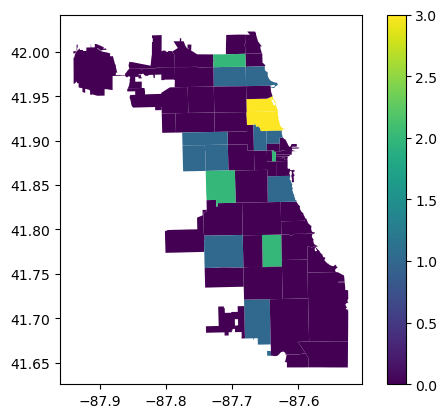

In [470]:
#gdf_m.plot()
gdf_m.plot("Zip_pop", legend=True)

In [ ]:
# use GeoPandas to read in the shape file with the ZIP code boundaries
gdf = gpd.read_file('data/Boundaries_ZIP_Codes/geo_export_94cfa385-03be-4b00-b827-c9e4fdd73a8f.shp')
gdf